# Análise das estatísticas dos salários dos jogadores de hockey da Liga Nacional de Hockey (NHL).

## Introdução

### Examinando o salário dos jogadores. 
Assim como em outros esportes, existem jogadores que recebem um salário muito alto comparado aos seus colegas no time, devido há vários fatores, como por exemplo como o jogador de futebol, Neymar do Paris Saint-Germain F.C com o salário de 40,8 Milhões GBP (2022), como também o jogador de basquete, LeBron James do Los Angeles Lakers com o salário de 41,18 milhões USD (2022).

Agora, quem são os jogadores mais caros da temporada 2016/2017 da NHL e também o que faz para ele ser tão valioso que os demais?

### Mas por que Hockey?
Hockey no gelo é uma paixão desde adolescente quando eu estava tentando achar algum esporte que eu gostasse, e sim, eu não gosto muito de futebol. Desde que eu vi um jogo pela TV, acabei procurando mais na internet e no dia seguinte fui comprar um jogo de Playstation 2, desde então, hockey no gelo continua sendo o meu esporte preferido.

### Como eu entendo de Hockey?
Como auxílio, utilizei os sites: https://hockeyanswered.com/ e https://www.nhl.com/stats/glossary para fazer consultas sobre estatísticas e seus significados.

### Origem do dataset.
Esse dataset foi obtido do site https://www.kaggle.com/datasets/camnugent/predict-nhl-player-salaries

### O que será feito.
Primeiramente, o dataset veio dividido em duas partes, como vai ser feito análises, serão mesclados para que se possa obter informações de vários jogadores. Depois, será renomeado, ajustado e organizado para que fique melhor sua visualização, então será feito uma limpeza nos dados faltantes e após isso será feito uma análise visual com a conclusão dos dados análisados.

### 1. Importando e mesclando os datasets.

In [850]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

%matplotlib inline

Importando a primeira parte do CSV.

In [851]:
nhl = pd.read_csv('train.csv', sep=',', encoding='latin-1', parse_dates=['Born']).copy()
nhl.head(10)

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,...,1.0,0.0,-0.2,-0.2,40.03,1.0,0.0,175.7,-0.4,-0.38
1,2250000,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,...,98.0,-0.2,3.4,3.2,2850.59,290.0,13.3,112.5,14.1,0.18
2,8000000,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,...,70.0,3.7,1.3,5.0,2486.75,102.0,6.6,114.8,36.8,0.57
3,3500000,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,...,22.0,0.0,0.4,0.5,1074.41,130.0,17.5,105.1,5.9,0.20
4,1750000,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,...,68.0,-0.1,1.4,1.3,3459.09,425.0,8.3,99.5,21.8,0.27
5,1500000,79-05-23,Strathroy,ON,CAN,CAN,70,192,1997.0,6.0,...,60.0,0.6,3.7,4.3,3069.81,150.0,4.5,107.4,20.8,0.26
6,950000,90-11-21,Stockholm,NaN,SWE,SWE,71,185,2009.0,2.0,...,1.0,0.0,0.1,0.1,113.46,1.0,0.0,89.8,0.6,0.18
7,842500,93-07-28,Toronto,ON,CAN,CAN,70,183,NaN,NaN,...,15.0,0.0,0.2,0.2,1261.25,28.0,12.0,106.3,6.2,0.21
8,1250000,92-06-14,Scarborough,ON,CAN,CAN,72,214,2010.0,2.0,...,40.0,-0.6,0.3,-0.3,2250.18,138.0,18.5,101.0,2.0,0.04
9,925000,93-04-27,Petawawa,ON,CAN,CAN,68,178,2011.0,7.0,...,7.0,0.0,0.0,0.0,373.48,13.0,9.0,101.9,2.1,0.21


Importando a segunda parte do CSV.

In [852]:
nhl2 = pd.read_csv('test.csv', sep=',', encoding='latin-1', parse_dates=['Born'])
nhl2.head(10)

,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,88-11-05,Ithaca,NY,USA,USA,72,216,2003.0,1.0,13.0,...,65,1.9,1.8,3.7,3418.06,243,19.5,110.4,47.3,0.59
1,00-02-29,Prague,NaN,CZE,CZE,72,195,2014.0,1.0,13.0,...,10,0.3,0.3,0.6,826.49,15,10.0,118.6,8.9,0.42
2,92-04-24,St. Louis,MO,USA,USA,75,227,2007.0,6.0,161.0,...,86,3.9,2.0,6.0,3155.13,316,8.9,115.0,52.5,0.65
3,99-07-05,Piikkio,NaN,FIN,FIN,72,182,2013.0,2.0,55.0,...,40,2.3,1.1,3.4,3044.03,105,24.3,111.9,38.1,0.52
4,96-10-27,Niagara Falls,NY,USA,USA,72,196,2011.0,2.0,36.0,...,25,0.8,1.1,1.9,1217.17,67,4.8,105.4,15.9,0.51
5,87-01-11,Bloomington,MN,USA,USA,74,210,2002.0,4.0,129.0,...,11,0.3,0.5,0.8,756.76,44,3.7,104.5,5.9,0.33
6,95-10-22,Kazan,NaN,RUS,RUS,73,180,2010.0,1.0,8.0,...,35,0.5,0.4,0.9,2050.94,91,12.0,104.5,5.9,0.12
7,87-06-14,Toronto,ON,CAN,CAN,75,210,2001.0,1.0,2.0,...,67,4.1,0.3,4.5,2831.91,74,3.8,120.9,44.6,0.66
8,89-04-07,Lloydminster,AB,CAN,CAN,72,192,2003.0,3.0,74.0,...,4,-0.2,0.0,-0.1,175.57,5,0.0,106.8,0.5,0.13
9,98-08-14,Ostervala,NaN,SWE,SWE,73,205,2012.0,1.0,11.0,...,94,5.8,1.4,7.2,3370.18,155,11.5,115.9,70.9,0.86


Importando o dataset salário dos jogadores.

In [853]:
nhl_salario = pd.read_csv('test_salaries.csv', sep=',', encoding='latin-1').copy()
nhl_salario.head(5)

,Salary
0,7000000.0
1,925000.0
2,2000000.0
3,667500.0
4,600000.0


Adicionado o dataset salário junto com os outros datasets.

In [854]:
nhl2.insert(0, 'Salary', nhl_salario)
nhl2.head(5)

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,7000000.0,88-11-05,Ithaca,NY,USA,USA,72,216,2003.0,1.0,...,65,1.9,1.8,3.7,3418.06,243,19.5,110.4,47.3,0.59
1,925000.0,00-02-29,Prague,NaN,CZE,CZE,72,195,2014.0,1.0,...,10,0.3,0.3,0.6,826.49,15,10.0,118.6,8.9,0.42
2,2000000.0,92-04-24,St. Louis,MO,USA,USA,75,227,2007.0,6.0,...,86,3.9,2.0,6.0,3155.13,316,8.9,115.0,52.5,0.65
3,667500.0,99-07-05,Piikkio,NaN,FIN,FIN,72,182,2013.0,2.0,...,40,2.3,1.1,3.4,3044.03,105,24.3,111.9,38.1,0.52
4,600000.0,96-10-27,Niagara Falls,NY,USA,USA,72,196,2011.0,2.0,...,25,0.8,1.1,1.9,1217.17,67,4.8,105.4,15.9,0.51


Juntando os datasets de treino e teste.

In [855]:
nhl = pd.concat(objs=[nhl, nhl2], ignore_index=True)
nhl

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,...,1.0,0.0,-0.2,-0.2,40.03,1.0,0.0,175.7,-0.4,-0.38
1,2250000,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,...,98.0,-0.2,3.4,3.2,2850.59,290.0,13.3,112.5,14.1,0.18
2,8000000,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,...,70.0,3.7,1.3,5.0,2486.75,102.0,6.6,114.8,36.8,0.57
3,3500000,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,...,22.0,0.0,0.4,0.5,1074.41,130.0,17.5,105.1,5.9,0.20
4,1750000,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,...,68.0,-0.1,1.4,1.3,3459.09,425.0,8.3,99.5,21.8,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,632500.0,97-03-11,Kingston,ON,CAN,CAN,74,219,2011.0,2.0,...,9.0,0.1,0.8,0.9,858.75,55.0,6.3,105.3,2.6,0.12
871,600000.0,95-01-30,Denver,CO,USA,USA,75,205,2009.0,2.0,...,5.0,-0.2,0.1,-0.1,588.65,29.0,13.0,99.6,0.4,0.03
872,5500000.0,97-06-18,Toronto,ON,CAN,CAN,78,210,2011.0,1.0,...,97.0,4.8,4.7,9.5,3133.83,226.0,2.7,113.6,65.1,0.80
873,832500.0,98-09-21,Hilton Head Isl.,SC,USA,USA,72,181,2013.0,1.0,...,59.0,2.8,1.4,4.2,3076.20,223.0,7.9,110.8,43.4,0.57


### Verificando as informações

In [856]:
nhl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Columns: 154 entries, Salary to GS/G
dtypes: float64(141), int64(2), object(11)
memory usage: 1.0+ MB


In [857]:
nhl.describe()

,Ht,Wt,DftYr,DftRd,Ovrl,GP,G,A,A1,A2,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
count,875.000000,875.000000,750.000000,750.000000,750.000000,874.000000,874.000000,874.000000,874.000000,874.000000,...,872.000000,873.000000,873.000000,873.000000,872.000000,873.000000,873.000000,872.000000,872.000000,871.000000
mean,73.006857,200.620571,2006.030667,2.757333,68.377333,50.372162,7.663924,12.858581,7.211327,5.705149,...,46.961009,1.309278,1.276632,2.588316,2003.917706,126.772050,9.214548,108.942775,21.879587,0.340230
std,3.068993,16.429658,73.441677,2.029106,63.107620,29.334846,8.634458,12.778843,7.845301,5.874022,...,33.722421,2.017639,1.330579,2.831855,1162.065119,101.669931,7.819438,8.904925,21.998210,0.292751
min,7.000000,6.000000,1.000000,1.000000,-6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.700000,-0.200000,-1.200000,33.510000,0.000000,0.000000,75.000000,-4.300000,-0.810000
25%,72.000000,190.000000,2006.000000,1.000000,17.000000,21.000000,1.000000,2.000000,1.000000,1.000000,...,15.000000,0.000000,0.200000,0.200000,857.705000,41.000000,4.600000,104.675000,2.600000,0.140000
50%,73.000000,200.000000,2010.000000,2.000000,47.000000,61.000000,5.000000,9.000000,5.000000,4.000000,...,45.000000,0.400000,1.000000,1.700000,2435.495000,114.000000,7.600000,109.200000,15.550000,0.310000
75%,75.000000,210.000000,2012.000000,4.000000,105.750000,78.000000,12.000000,20.000000,11.000000,9.000000,...,74.000000,2.200000,1.800000,4.200000,3012.970000,190.000000,12.000000,113.925000,35.475000,0.530000
max,81.000000,265.000000,2016.000000,14.000000,291.000000,82.000000,44.000000,70.000000,66.700000,31.000000,...,137.000000,10.500000,7.200000,15.300000,3527.100000,622.000000,61.000000,175.700000,104.700000,1.280000


Quantidade de linhas e colunas.

In [858]:
nhl.shape

(875, 154)

# 2. Limpeza e Tratamento de dados

Etapa, será feita a limpeza dos dados e também ajustes de algumas colunas para que na etapa de visualização tudo fique muito mais claro.

In [859]:
colunas_com_null = nhl.columns[nhl.isna().any()].tolist()
colunas_com_null

['Pr/St',
 'DftYr',
 'DftRd',
 'Ovrl',
 'First Name',
 'Position',
 'Team',
 'GP',
 'G',
 'A',
 'A1',
 'A2',
 'PTS',
 '+/-',
 'E+/-',
 'PIM',
 'Shifts',
 'TOI',
 'TOIX',
 'TOI/GP',
 'TOI/GP.1',
 'TOI%',
 'IPP%',
 'SH%',
 'SV%',
 'PDO',
 'F/60',
 'A/60',
 'Pct%',
 'Diff',
 'Diff/60',
 'iCF',
 'iCF.1',
 'iFF',
 'iSF',
 'iSF.1',
 'iSF.2',
 'ixG',
 'iSCF',
 'iRB',
 'iRS',
 'iDS',
 'sDist',
 'sDist.1',
 'Pass',
 'iHF',
 'iHF.1',
 'iHA',
 'iHDf',
 'iMiss',
 'iGVA',
 'iTKA',
 'iBLK',
 'iGVA.1',
 'iTKA.1',
 'iBLK.1',
 'BLK%',
 'iFOW',
 'iFOL',
 'iFOW.1',
 'iFOL.1',
 'FO%',
 '%FOT',
 'dzFOW',
 'dzFOL',
 'nzFOW',
 'nzFOL',
 'ozFOW',
 'ozFOL',
 'FOW.Up',
 'FOL.Up',
 'FOW.Down',
 'FOL.Down',
 'FOW.Close',
 'FOL.Close',
 'OTG',
 '1G',
 'GWG',
 'ENG',
 'PSG',
 'PSA',
 'G.Bkhd',
 'G.Dflct',
 'G.Slap',
 'G.Snap',
 'G.Tip',
 'G.Wrap',
 'G.Wrst',
 'CBar ',
 'Post',
 'Over',
 'Wide',
 'S.Bkhd',
 'S.Dflct',
 'S.Slap',
 'S.Snap',
 'S.Tip',
 'S.Wrap',
 'S.Wrst',
 'iPenT',
 'iPenD',
 'iPENT',
 'iPEND',
 'iPe

<AxesSubplot:>

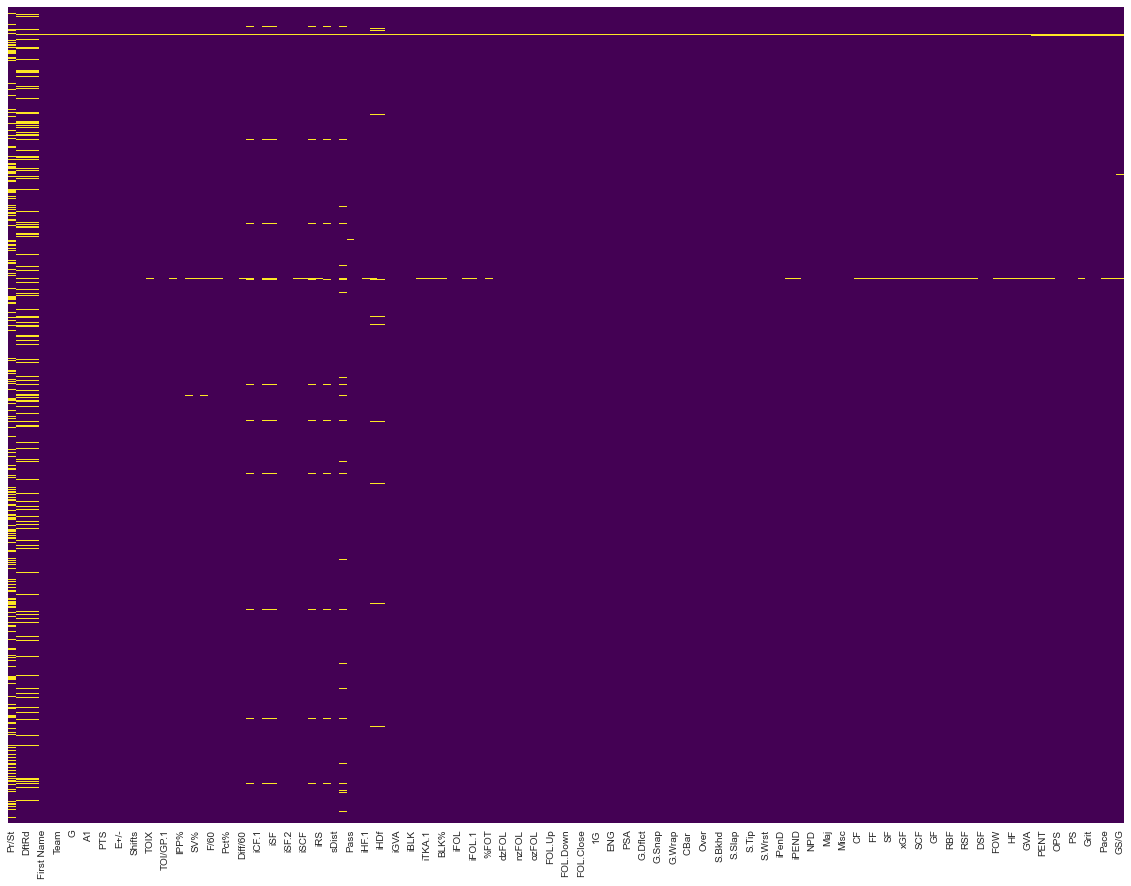

In [860]:
plt.figure(figsize=(20, 15))
sns.heatmap(nhl[colunas_com_null].isnull(), yticklabels=False, cbar=False, cmap='viridis')

Como indica esse gráfico e a lista, no geral, os dados que mais faltam são:
* Pr/St: Que é a província ou o Estado que cada jogador nasceu.
* DftYr: é o ano do Draft que o jogador foi contratado.
* DftRd: Que é round do draft que o jogador foi contratado pelo time.
* Ovrl: É o desempenho do jogador no ano de seu Draft.
* First Name: O nome do jogador, sem incluir o sobrenome.
* Posição: É a posição que o jogador joga.
* Team: É o time que o jogador joga.

E o restante são dados relacionados a performance de cada jogador.

Verificando a quantidade de nulls.

In [861]:
def verificar_nulos(nhl):
    return (len(nhl) - nhl.count()).sum()

In [862]:
verificar_nulos(nhl)

907

No dataset, há um total de 907 valores nulos.

Parece que há um jogador que possui a maioria de seus dados faltantes, então será descoberto quem é ele.

In [863]:
nhl.head(30)

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,...,1.0,0.0,-0.2,-0.2,40.03,1.0,0.0,175.7,-0.4,-0.38
1,2250000,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,...,98.0,-0.2,3.4,3.2,2850.59,290.0,13.3,112.5,14.1,0.18
2,8000000,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,...,70.0,3.7,1.3,5.0,2486.75,102.0,6.6,114.8,36.8,0.57
3,3500000,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,...,22.0,0.0,0.4,0.5,1074.41,130.0,17.5,105.1,5.9,0.20
4,1750000,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,...,68.0,-0.1,1.4,1.3,3459.09,425.0,8.3,99.5,21.8,0.27
5,1500000,79-05-23,Strathroy,ON,CAN,CAN,70,192,1997.0,6.0,...,60.0,0.6,3.7,4.3,3069.81,150.0,4.5,107.4,20.8,0.26
6,950000,90-11-21,Stockholm,NaN,SWE,SWE,71,185,2009.0,2.0,...,1.0,0.0,0.1,0.1,113.46,1.0,0.0,89.8,0.6,0.18
7,842500,93-07-28,Toronto,ON,CAN,CAN,70,183,NaN,NaN,...,15.0,0.0,0.2,0.2,1261.25,28.0,12.0,106.3,6.2,0.21
8,1250000,92-06-14,Scarborough,ON,CAN,CAN,72,214,2010.0,2.0,...,40.0,-0.6,0.3,-0.3,2250.18,138.0,18.5,101.0,2.0,0.04
9,925000,93-04-27,Petawawa,ON,CAN,CAN,68,178,2011.0,7.0,...,7.0,0.0,0.0,0.0,373.48,13.0,9.0,101.9,2.1,0.21


Parece que é um jogador da cidade de Merrimack no USA, vamos ver se a situação dele há alguma salvação.

In [864]:
mask = nhl.index == 29
nhl.loc[mask, 'First Name':]

,First Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Parece que nem nome possui, então esse jogador será excluido do dataset.

In [865]:
nhl.drop(29, inplace=True)

Primeiramente, para saber se não há irregularidades no dataset, eu verifico as colunas que já podem indicar valores estranhos, como por exemplo a coluna "Team", não pode haver valores nulos ou times que não existem. Para eu saber quais times existentes daquela época eu consultei os links que foram disponibilizados na introdução.

In [866]:
nhl['Team'].unique()

array(['OTT', 'BUF', 'VAN', 'WSH', 'CHI', 'N.J', 'T.B', 'ARI/MIN', 'CGY',
       'FLA', 'PIT', 'EDM/NYR', 'TOR', 'STL', 'BOS', 'COL', '723.6',
       'PHI', 'CAR', 'ANA/VAN', 'MTL', 'NSH', 'DAL/MTL', 'EDM', 'L.A',
       'DAL', 'DET', 'CBJ', 'ANA', 'ARI', 'MIN', 'NYI', 'S.J', 'WPG',
       'L.A/MTL', 'N.J/NSH/VAN', 'OTT/VAN', 'COL/S.J', 'COL/MTL', 'NYR',
       'ARI/CGY', 'STL/WSH', 'FLA/TOR', 'FLA/NYR', 'COL/NSH', 'MTL/T.B',
       'DET/MTL', 'NSH/STL', 'BOS/WPG', 'DET/TOR', 'CAR/STL', 'CBJ/DAL',
       'PHI/PIT', 'EDM/MTL', 'OTT/S.J', 'ARI/NYR', 'N.J/NSH', 'CAR/PIT',
       'ARI/TOR', 'DET/FLA', 'CBJ/N.J', 'COL/TOR', 'ANA/N.J', 'T.B/TOR',
       'ANA/FLA', 'CGY/OTT', 'PIT/TOR', 'PHI/T.B', 'CAR/OTT', 'ARI/WPG',
       'DET/NYR', 'COL/L.A', 'FLA/T.B', 'BUF/NSH', 'NYR/OTT', 'CHI/DET',
       'S.J/VAN', 'CHI/DAL', 'ANA/DAL'], dtype=object)

Pelo o que é mostrado, parece que há jogadores que possuem mais do que um time, então será apenas considerado o último time que o jogador jogou nessa temporada, para que essa coluna faça sentido e também há um time chamado ```'734.6'``` e um time nulo, primeiramente, vou verificar como ele está organizado.

In [867]:
nhl.loc[nhl['Team']=='723.6']

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
30,haller,Tim,C,BOS,59,7,7,6,1.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como essa linha há valores trocados e há bastante valores nulos, essa linha será removida.

In [868]:
nhl.drop(30, inplace=True)

Pegando apenas o último time.

In [869]:
nhl.loc[nhl['Team'].str.contains('/', na=False), 'Team'] = nhl['Team'].str.split('/').str.get(1)
nhl['Team'].unique()

array(['OTT', 'BUF', 'VAN', 'WSH', 'CHI', 'N.J', 'T.B', 'MIN', 'CGY',
       'FLA', 'PIT', 'NYR', 'TOR', 'STL', 'BOS', 'COL', 'PHI', 'CAR',
       'MTL', 'NSH', 'EDM', 'L.A', 'DAL', 'DET', 'CBJ', 'ANA', 'ARI',
       'NYI', 'S.J', 'WPG'], dtype=object)

Como ainda há um time que é nulo, e não como não tem como definir um certo time para essa linha, ela será removida.

In [870]:
nhl = nhl[nhl['Team'].notnull()].copy()


No hockey há conferências e divisões. Existem duas conferências:
* Western Conference.
* Eastern Conference.

E dentro das conferências, cada uma possuem duas regiões
* Pacific (Western)
* Central (Western)
* Metro (Eastern)
* Atlantic (Eastern)

Como no dataset não está assim, irei separar para poder visualizar e obter melhores informações.

In [871]:
# Separando em regiões
pacific = ['S.J', 'ANA', 'L.A', 'CGY', 'EDM', 'ARI', 'VAN']
central = ['DAL', 'NSH', 'STL', 'CHI', 'WPG', 'MIN', 'COL']
metro = ['WSH', 'PIT', 'NYI', 'PHI', 'NYR', 'CBJ', 'CAR', 'N.J']
atlantic = ['T.B', 'FLA', 'MTL', 'BOS', 'DET', 'BUF', 'OTT', 'TOR']

In [872]:
# Criando os arrays para fazer o loop.
regioes = ['Pacific', 'Central', 'Metro', 'Atlantic']
nhl['Team'].head(10)
def definirRegiao(x):
    if x in pacific:
        return 'Pacific'
    elif x in central:
        return 'Central'
    elif x in metro:
        return 'Metro'
    elif x in atlantic:
       return 'Atlantic'

In [873]:
# Obtendo uma copia do time para facilitar a distribuição da região.
nhl['Region'] = nhl['Team'].apply(definirRegiao).copy()
nhl['Region'].unique()



array(['Atlantic', 'Pacific', 'Metro', 'Central'], dtype=object)

Para que o dataset fique organizado, foi criado uma função que recebe a posição da coluna alvo que se possa colocar ao lado dela, ao invés de toda vez deixar as novas colunas no final.

In [874]:
def posicionar_coluna(coluna_alvo, coluna_sub):
    # Pegando a posição da coluna alvo
    posicao_coluna = nhl.columns.get_loc(coluna_alvo)
    # Inserindo a nova coluna criada ao lado da alvo e depois retirando à antiga posição
    nhl.insert(posicao_coluna+1, coluna_sub, value=nhl.pop(coluna_sub).copy())

In [875]:
# Selecionado a coluna 'Team' para que a coluna 'Region' fique ao lado dela.
posicionar_coluna('Team', 'Region')

In [876]:
# Separando por conferência através das regiões.
def definirConferencia(x):
    if x in ['Pacific', 'Central']:
        return 'Western'
    else:
        return 'Eastern'

In [877]:
# Aplicando a função de definir a conferência
nhl['Conference'] = nhl['Region'].apply(definirConferencia).copy()

In [878]:
# Selecionado a coluna 'Team' para que a coluna 'Conference' fique ao lado dela.
posicionar_coluna('Team', 'Conference')

In [879]:
nhl['Conference'].head(5)

0    Eastern
1    Eastern
2    Eastern
3    Western
4    Eastern
Name: Conference, dtype: object

Assim como os times, não há nenhum faltando, mas não significa que as posições estão corretas. 

In [880]:
nhl['Position'].unique()

array(['D', 'RW', 'LW/C', 'RW/C/LW', 'C', 'C/RW', 'LW', 'RW/LW',
       'C/LW/RW', 'LW/RW', 'C/LW', 'LW/C/RW', 'LW/RW/C', 'RW/C',
       'C/RW/LW', 'RW/LW/C', 'D/LW', 'C/D', 'D/RW', 'C/LW/C'],
      dtype=object)

Como há jogadores que joga em múltiplas posições, considerarei apenas a primeira. 

In [881]:

nhl.loc[nhl['Position'].str.contains('/', na=False), 'Position'] = nhl['Position'].str.split('/').str.get(0)
nhl['Position'].unique()


array(['D', 'RW', 'LW', 'C'], dtype=object)

Agora, verificando a província/estado, utiliznando a mesma lógica do "Team".

In [882]:
nhl.loc[:, 'Pr/St'].unique()

array(['QC', 'ON', 'MN', nan, 'MB', 'AB', 'BC', 'SK', 'CO', 'MI', 'AL',
       'NY', 'CT', 'NJ', 'WI', 'FL', 'PA', 'CA', 'MA', 'IL', 'AK', 'AZ',
       'MO', 'PE', 'RI', 'NS', 'ND', 'TX', 'NE', 'WA', 'OH', 'UT', 'NH',
       'NC', 'IN', 'OK', 'ME', 'NL', 'SC'], dtype=object)

Pelo o que é mostrado, a única coisa estranha é que ela possui um valor nulo, o restante parece estar correto. Então, esses valores nulos serão preenchidos com a String ```'Unknwon'```, que significa 'desconhecido' em português.

In [883]:
nhl.loc[:, 'Pr/St'].fillna('Unknwon', inplace=True)

Como foi mostrado na lista anteriormente, sabe-se que o a coluna ```'Cntry'``` não há valores nulos, mas não significa que os países estão certos, e também criarei uma coluna separandos por continente:

In [884]:
nhl['Cntry'].unique()

array(['CAN', 'USA', 'SWE', 'CZE', 'CHE', 'FRA', 'DEU', 'SVK', 'RUS',
       'FIN', 'AUT', 'NOR', 'DNK', 'EST', 'LVA', 'ITA', 'HRV', 'GBR',
       'SVN'], dtype=object)

Segundo o ISO-3166-Alpha-3, todos essas siglas dos países estão corretas e não há nenhum valor que não exista, todos esses países são europeus ou norte-americanos, não há nenhum outro jogador que não venha desses continentes.

In [885]:
# Como não há valores faltantes, basicamente, se o país não for Canadense ou Americano, ele fará parte da europa. 
def definirContinente(x):
    if x in ['CAN', 'USA']:
        return 'North America'
    else:
        return 'Europe'

In [886]:
# Aplicando a função a coluna e substituindo-a.
nhl['Continent'] = nhl['Nat'].apply(definirContinente).copy()
nhl['Continent'].unique()

array(['North America', 'Europe'], dtype=object)

In [887]:
posicionar_coluna('Nat', 'Continent')

No caso da coluna 'DftYr', não podemos simplesmente colocar a mediana, pois, geralmente o ano do draft é quando o jogador possui 18 anos em média, assumindo que há vários jogadores com diversas idades, será criada uma coluna chamada ```'Year'```, que receberá o ano do jogador, pois, nesse dataset todo jogador possui um ano de nascimento, mas nem todos possuem DftYr, então a coluna ```'Year'``` será agrupada e através da mediana do grupo será atribuida para cada ano o ano do DftYr com base no ano que o jogador nasceu.

In [888]:
# Verificando como a coluna Born está formatada.
nhl['Born'].head(5)

0    97-01-30
1    93-12-21
2    88-04-16
3    92-01-07
4    94-03-29
Name: Born, dtype: object

Importante notar que a coluna ```'Born'``` há apenas os dois últimos valores do ano, para fins de formatação, irei formatar o ano com quatro digitos e colocarei no formato de data padrão (DD/MM/AAAA).

In [889]:
# Essa função irá pegar separar a String da coluna Born, pegando apenas o primeiro valor que é o ano de nascimento.
def conversor_data(ano):
    # Repartindo a String
    repartir = ano.split('-')
    # Pegando o primeiro valor que é o ano e convertendo em um int para que possa comparar o valor.
    ano = repartir[0]
    ano = int(ano)
    # Criando a String com formato de data padrão.
    dia_mes = repartir[2] + '/' + repartir[1] + '/'
    ano_nascimento = str(ano) 
    # Através do número que está comparando será atribuido uma String em específico.
    if ano > 99:
        return dia_mes + '20' + ano_nascimento
    elif (ano == 0) | (ano == 1):
        return dia_mes + '200' + ano_nascimento
    else:
        return dia_mes + '19' + ano_nascimento

In [890]:
# Aplicando a função criada para a coluna Born e substituindo-a.
nhl['Born'] = nhl['Born'].apply(conversor_data).copy()
nhl['Born'].head(5)

0    30/01/1997
1    21/12/1993
2    16/04/1988
3    07/01/1992
4    29/03/1994
Name: Born, dtype: object

In [891]:
# Verificando o jogador mais novo
ano_mais_novo = nhl['Born'].str.split('/').str.get(2).min()
print('O ano do jogador mais novo:', ano_mais_novo)

O ano do jogador mais novo: 1972


In [892]:
# Criando a coluna Ano e pegando apenas o ano da coluna Born.
nhl['Year'] = nhl['Born'].str.split('/').str.get(2)
nhl['Year'] = pd.to_numeric(nhl['Year'].copy())
nhl['Year'].head(5)

0    1997
1    1993
2    1988
3    1992
4    1994
Name: Year, dtype: int64

In [893]:
posicionar_coluna('Born', 'Year')

In [894]:
# Agrupando a coluna Year
year = nhl.groupby('Year')
# Fazendo a mediana de cada ano e atribuir para cada jogador com os dados faltantes.
nhl['DftYr'].fillna((year['DftYr'].transform('median')), inplace=True)
nhl['DftYr'].head(5)

0    2015.0
1    2012.0
2    2006.0
3    2010.0
4    2012.0
Name: DftYr, dtype: float64

In [895]:
nhl['DftYr'].head(5)

0     2015.0
1     2012.0
2     2006.0
3     2010.0
4     2012.0
5     1997.0
6     2009.0
7     2011.0
8     2010.0
9     2011.0
10    2004.0
11    2010.0
12    2006.0
13    2014.0
14    2007.0
15    2012.0
16    2011.0
17    2009.0
18    2004.0
19    2009.0
20    2012.0
21    2010.0
22    2014.0
23    2008.0
24    2015.0
25    2014.0
26    2016.0
27    2007.0
28    2012.0
31    2009.0
32    2010.0
33    2011.0
34    2009.0
35    2010.0
36    2009.0
37    2008.0
38    2012.0
39    2008.0
40    2005.0
41    2011.0
42    2009.0
43    2007.0
44    2008.0
45    2007.0
46    2013.0
47    2006.0
48    2010.0
49    2015.0
50    2015.0
51    2006.0
Name: DftYr, dtype: float64

As colunas ```'DftRd'``` e ```'Ovrl'``` depende de jogador para jogador baseado na sua performance de seu draft, as colunas serão preenchidas com medianas.

In [896]:
moda_draft = nhl['DftRd'].median()
nhl.loc[:, 'DftRd'].fillna(int(moda_draft), inplace=True)

In [897]:
moda_desem = nhl['Ovrl'].median()
nhl.loc[:, 'Ovrl'].fillna(int(moda_desem), inplace=True)

Convertendo ```'Ht'``` que é a altura de polegadas para metros e ```'Wt'``` que é o peso de pounds para kilogramas.

In [898]:
nhl['Ht'] = nhl['Ht'].apply(lambda x: round(x/39.370, 2)).copy()
nhl['Ht'].head(5)


0     1.88
1     1.88
2     1.83
3     1.96
4     1.93
5     1.78
6     1.80
7     1.78
8     1.83
9     1.73
10    1.85
11    1.88
12    1.83
13    1.85
14    1.83
Name: Ht, dtype: float64

In [899]:
nhl['Wt'] = nhl['Wt'].apply(lambda x: round(x/2.2046, 2)).copy()
nhl['Wt'].head(5)

0    86.18
1    93.89
2    98.88
3    99.79
4    98.43
Name: Wt, dtype: float64

Como foi mostrado no primeiro gráfico anteriormente, há poucos dados faltantes após a coluna ```GP```, então para não perder esses dados, eu fiz uma mediana para completar esses dados faltantes, o motivo da mediana é que como se trata de jogadores, há jogadores que são melhores que os outros e isso pode enviesar os dados, então para que não haja tanta diferença, pegarei a mediana.

In [900]:
nhl.loc[:, 'GP':]= nhl.loc[:, 'GP':].apply(lambda x: x.fillna(x.median()), axis=0).copy()

In [901]:
nhl.loc[:, 'Salary':].head(5)

,Salary,Born,Year,City,Pr/St,Cntry,Nat,Continent,Ht,Wt,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000,30/01/1997,1997,Sainte-Marie,QC,CAN,CAN,North America,1.88,86.18,...,1.0,0.0,-0.2,-0.2,40.03,1.0,0.0,175.7,-0.4,-0.38
1,2250000,21/12/1993,1993,Ottawa,ON,CAN,CAN,North America,1.88,93.89,...,98.0,-0.2,3.4,3.2,2850.59,290.0,13.3,112.5,14.1,0.18
2,8000000,16/04/1988,1988,St. Paul,MN,USA,USA,North America,1.83,98.88,...,70.0,3.7,1.3,5.0,2486.75,102.0,6.6,114.8,36.8,0.57
3,3500000,07/01/1992,1992,Ottawa,ON,CAN,CAN,North America,1.96,99.79,...,22.0,0.0,0.4,0.5,1074.41,130.0,17.5,105.1,5.9,0.20
4,1750000,29/03/1994,1994,Toronto,ON,CAN,CAN,North America,1.93,98.43,...,68.0,-0.1,1.4,1.3,3459.09,425.0,8.3,99.5,21.8,0.27
5,1500000,23/05/1979,1979,Strathroy,ON,CAN,CAN,North America,1.78,87.09,...,60.0,0.6,3.7,4.3,3069.81,150.0,4.5,107.4,20.8,0.26
6,950000,21/11/1990,1990,Stockholm,Unknwon,SWE,SWE,Europe,1.80,83.92,...,1.0,0.0,0.1,0.1,113.46,1.0,0.0,89.8,0.6,0.18
7,842500,28/07/1993,1993,Toronto,ON,CAN,CAN,North America,1.78,83.01,...,15.0,0.0,0.2,0.2,1261.25,28.0,12.0,106.3,6.2,0.21
8,1250000,14/06/1992,1992,Scarborough,ON,CAN,CAN,North America,1.83,97.07,...,40.0,-0.6,0.3,-0.3,2250.18,138.0,18.5,101.0,2.0,0.04
9,925000,27/04/1993,1993,Petawawa,ON,CAN,CAN,North America,1.73,80.74,...,7.0,0.0,0.0,0.0,373.48,13.0,9.0,101.9,2.1,0.21


In [902]:
# Verificando se há valores faltantes no geral.
nhl.isnull().values.any()

False

In [903]:
# Verificando a quantidade de linhas que sobraram.
nhl.shape

(873, 158)

Originalmente, eram 875 linhas, uma delas faltavam grande parte dos dados e a outra estava completamente com os dados trocados e faltando, então foi um ótimo aproveitamento.

<AxesSubplot:>

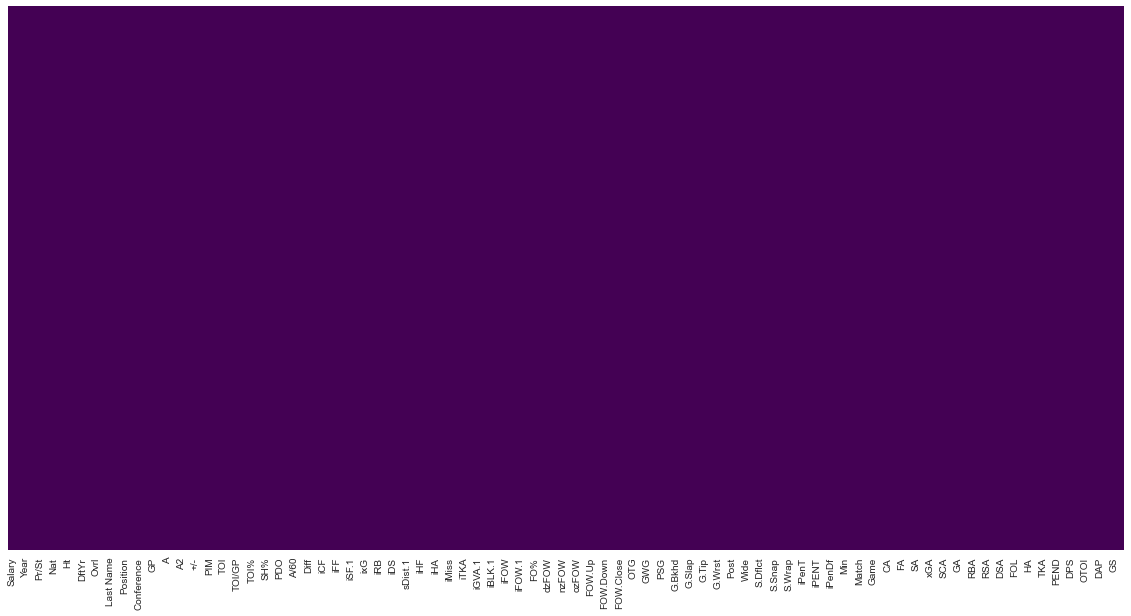

In [904]:
# Visualizando se de fato não há nenhum dado faltante.
plt.figure(figsize=(20, 10))
sns.heatmap(nhl.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Como pode ser visto no gráfico, não sobrou nenhum valor nulo e também foram adicionadas novas colunas.

In [905]:
nhl['Salary'] = nhl['Salary'].astype(float).copy()

## 3. Visualização
Nessa etapa, será feito uma análise explotória em torno do salários dos jogadores da NHL, tentando descobrir quais times pagam os maiores salários e quais são os jogadores que mais recebem através de parâmetros que são utilizados para medir o desempenho dos jogadores.

É importante antes saber que o salário dos jogadores são medidos por ano e todos eles recebem em dólar americano, mesmo aqueles que jogam em times Canadenses.

In [906]:
# Deixando os tamanhos dos gráficos com 25 de altura e 10 de largura.
plt.rcParams['figure.figsize'] = (25, 10)
sns.set_palette('tab10')

In [907]:
# Separando as conferências em grupos
grupo_conferencia = nhl.groupby('Conference')
eastern = grupo_conferencia.get_group('Eastern').reset_index().copy()
western = grupo_conferencia.get_group('Western').reset_index().copy()
conferencia_array = [western, eastern]
titulo_conferencia = ['Western', 'Eastern']

In [908]:
# Separando as regiões em grupos
grupo_regiao = nhl.groupby('Region')
atlantic = grupo_regiao.get_group('Atlantic').dropna().reset_index().copy()
pacific = grupo_regiao.get_group('Pacific').reset_index().copy()
metro = grupo_regiao.get_group('Metro').reset_index().copy()
central = grupo_regiao.get_group('Central').reset_index().copy()

regioes_titulo = [ 'Pacific (Western)',  'Metro (Eastern)', 'Central (Western)', 'Atlantic (Eastern)']

regioes_array = [pacific, metro, central, atlantic]

# 3. Visualização



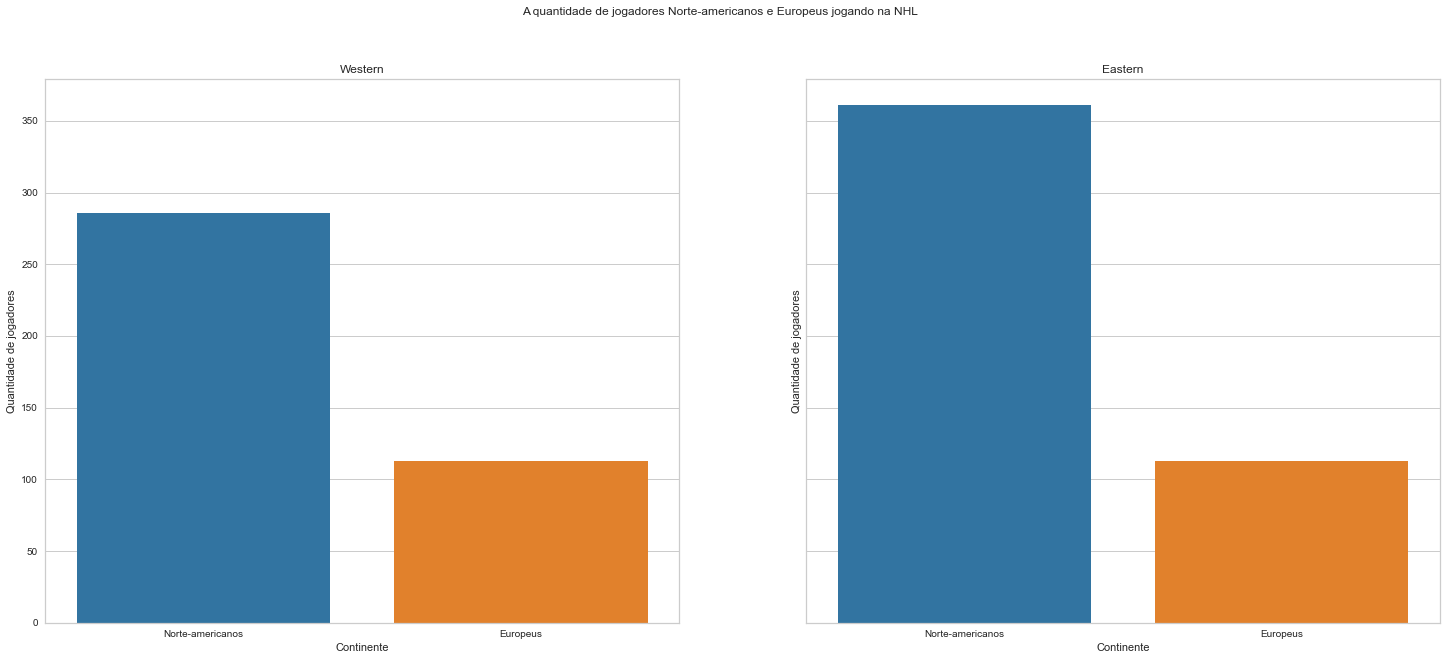

In [909]:
fig, axes = plt.subplots(1, 2, sharey=True)
fig.suptitle('A quantidade de jogadores Norte-americanos e Europeus jogando na NHL')
for i in range(2):
    
    sns.countplot(ax=axes[i], x='Continent', data=conferencia_array[i])
    axes[i].set_title(titulo_conferencia[i])
    axes[i].set(xlabel='Continente', ylabel='Quantidade de jogadores', xticklabels=['Norte-americanos', 'Europeus'] )
    

Analisando esse gráfico de barras, percebemos que há mais jogadores norte-americanos na conferência Easter (com mais de 50 jogadores, aproximadamente) do que da conferência Western, porém, existem a mesma quantidade de jogadores europeus em ambas conferências (com 110 jogadores, aproximadamente).

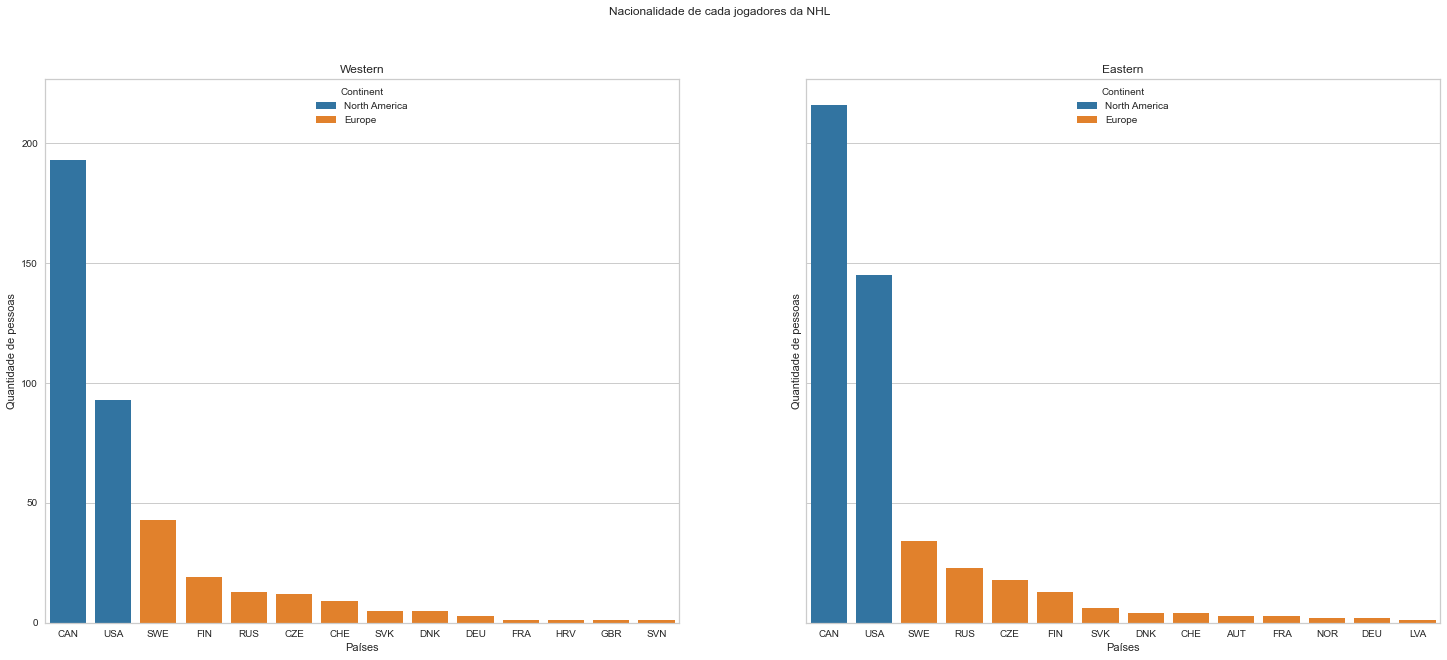

In [910]:
fig, axes = plt.subplots(1, 2, sharey=True)
fig.suptitle('Nacionalidade de cada jogadores da NHL')
for i in range(2):
    
    sns.countplot(ax=axes[i], x='Nat', data=conferencia_array[i], order=conferencia_array[i]['Nat'].value_counts().index, hue='Continent', dodge=False)
    axes[i].set_title(titulo_conferencia[i])
    axes[i].set(xlabel='Países', ylabel='Quantidade de pessoas' )

Por curiosidade, criei esse gráfico de barras para visualizar a quantidade de cada nacionalidade dos jogadores, separados por suas conferências da NHL, obviamente, como dito anteriormente, a grande maioria é composto pelos norte-americanos, sendo em ambas conferências a nacionalidade mais dominante é os Canandenses, sendo a segunda maior os Americanos. Já os europeus, em ambas conferências, os Suecos são dominantes, sendo que há mais suecos no lado Western do que do Eastern.
Os restantes dos europeus não há mais um padrão, mas há uma quantidade de jogadores Russos, Finlandeses e Tchécos.

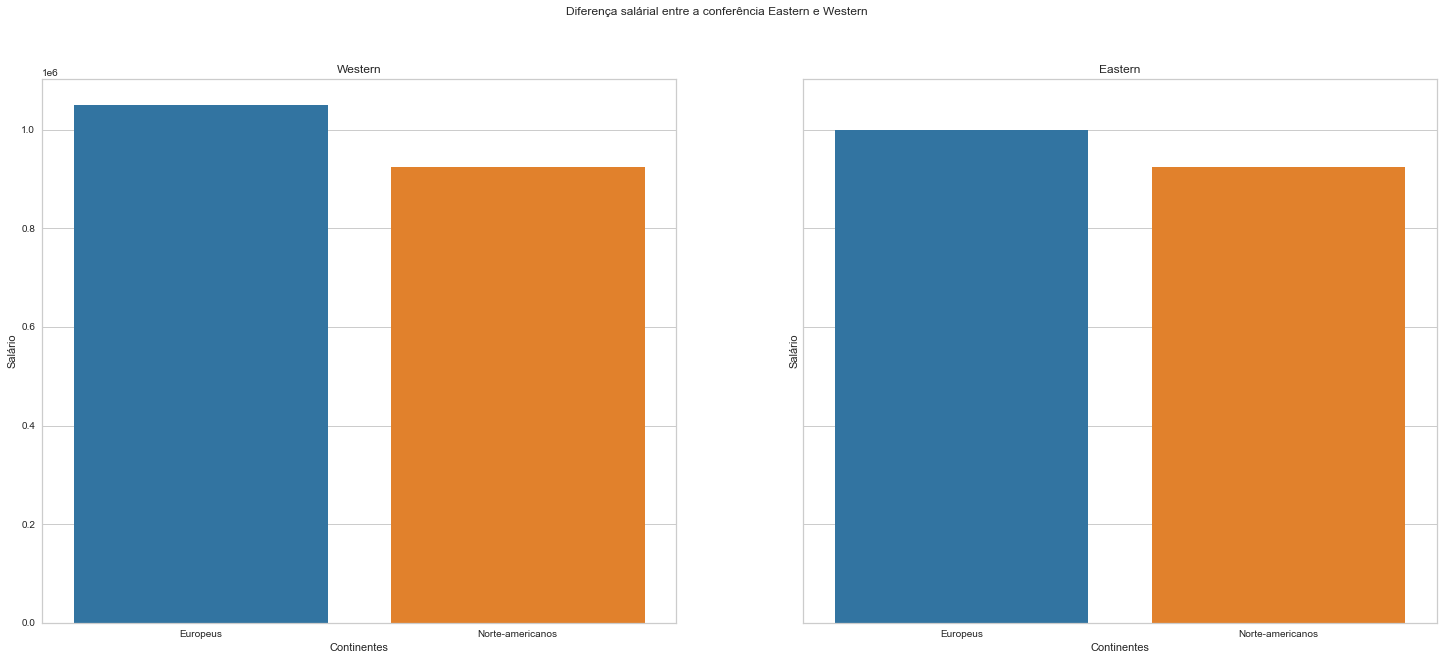

In [911]:
fig, axes = plt.subplots(1,2, sharey=True)
fig.suptitle('Diferença salárial entre a conferência Eastern e Western')
for i in range(len(conferencia_array)):
    
    sns.barplot(ax=axes[i], x='Continent', y='Salary', data=conferencia_array[i].
    groupby(['Continent'])['Salary'].aggregate(np.median).reset_index().sort_values('Salary', ascending=False))
    axes[i].set(xlabel='Continentes', ylabel='Salário', xticklabels=['Europeus', 'Norte-americanos'])
    axes[i].set_title(titulo_conferencia[i])

Apesar que há mais jogadores Norte-americanos no lado Eastern, em ambas conferências o salário mediano é igual (Aproximadamente 800 Mil). E os jogadores europeus recebem aproximadamente 20% a mais do que os jogadores americanos (Mais de 1 milhão), obviamente que, como há menos jogadores europeus do que norte-americanos, a quantidade de amostra é menor e faz parecer que jogadores europeus vão receber muito mais do que os norte-americanos.

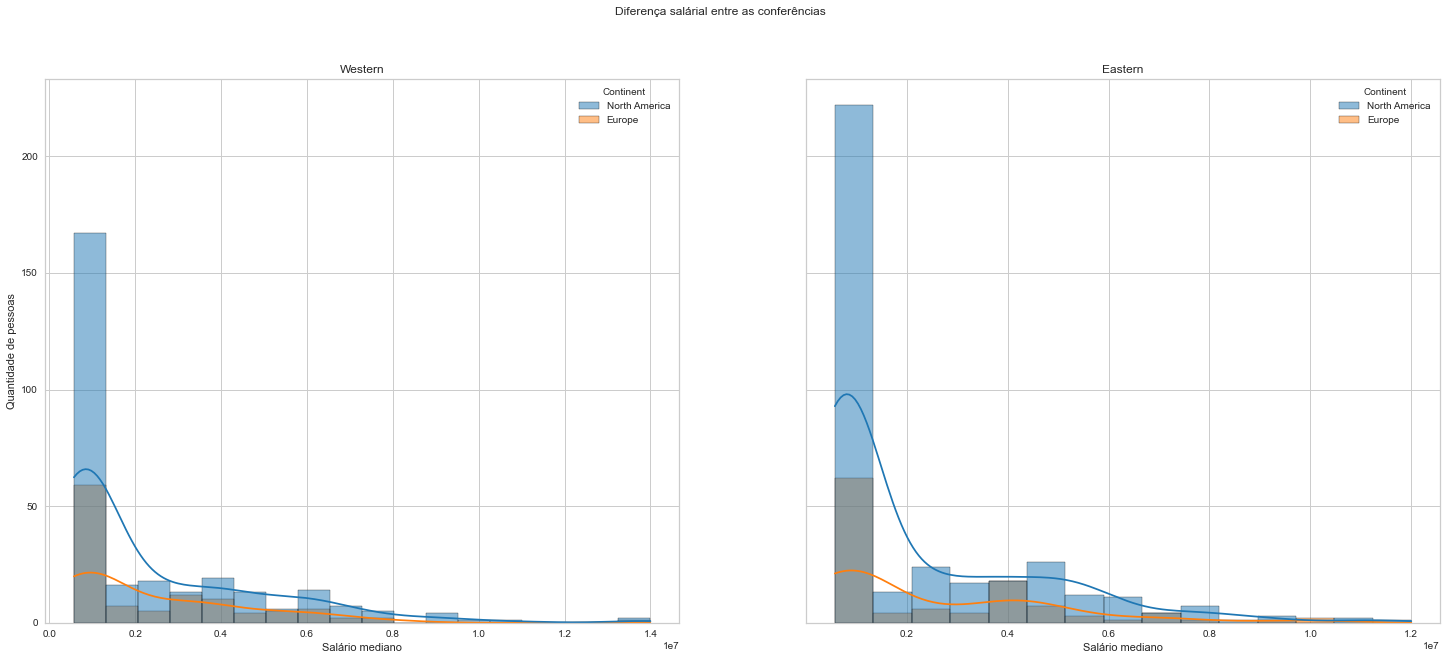

In [912]:
fig, axes = plt.subplots(1,2, sharey=True)
fig.suptitle('Diferença salárial entre as conferências')
for i in range(len(conferencia_array)):
    
    sns.histplot(ax=axes[i], x='Salary', hue='Continent', data=conferencia_array[i], kde=True)
    axes[i].set_title(titulo_conferencia[i])
    axes[i].set(xlabel='Salário mediano', ylabel='Quantidade de pessoas')

Analisando esse histograma, como já era esperado, a grande maioria dos jogadores recebem um salário em torno de 1 Milhão, sendo na conferência Western, metade desses jogadores são norte-americanos e europeus, ainda nesse gráfico, a segunda maior quantidade o salário de 4 milhões, sendo metade desses jogadores norte-americanos e europeus respectivamente. Há uma quantidade igual entre norte-americanos e europeus recebendo 3 milhões.

No lado Eastern, ocorre de forma parecida como no lado Western, porém a segunda maior quantidade de jogadores recebem 5 milhões, sendo grande parte delas por jogadores americanos. Há uma quantidade igual de europeus e norte-americanos que recebem 4 milhões.

Obviamente que, como há uma maior quantidade de norte-americano do que europeus, assume-se que a maioria dos jogadores norte-americanos irão receber mais do que os europeus, porém, como já dito anteriormente, há uma certa quantidade equilibrada onde europeus e norte-americanos recebem o mesmo, mas não há uma quantidade onde os europeus prevalecem sobre os norte-americanos.

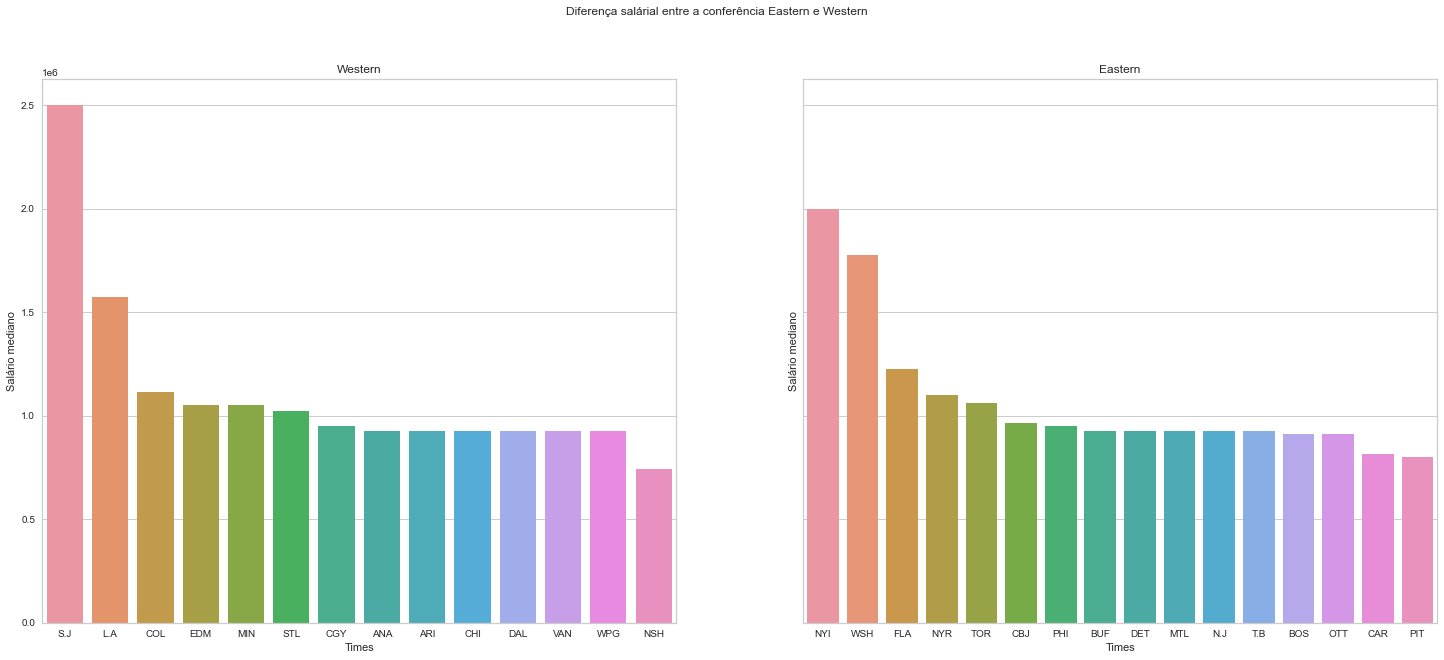

In [913]:
fig, axes = plt.subplots(1,2, sharey=True)
fig.suptitle('Diferença salárial entre a conferência Eastern e Western')
for i in range(len(conferencia_array)):
    
    sns.barplot(ax=axes[i], x='Team', y='Salary', data=conferencia_array[i].
    groupby(['Team'])['Salary'].aggregate(np.median).reset_index().sort_values('Salary', ascending=False))
    axes[i].set_title(titulo_conferencia[i])
    axes[i].set(xlabel='Times', ylabel='Salário mediano')

Através desse gráficos de barras separados por conferências, agora visualizando o time, percebe-se que a conferência Eastern há dois times a mais do que o lado Western, explicando o porquê de ter mais jogadores do lado Eastern nos gráficos anteriores.

Nota-se que também, em ambos os gráficos há dois times que dominam em relação a mediana salarial, no lado Western os Times San Jose Sharks (S.J) e Los Angeles Kings (L.A) possuem um saláriano mediano aproximado de 2.5 Milhões e 1.6 Milhões respectivamente, já no lado Eastern, os salários dominantes são dos times: New York Islanders (NYI) e Washigton Capitals (WSH), com os salários próximo de 2 Milhões e 1.8 Milhões respectivamente. 

Os demais times possuem salários medianos muito parecidos, próximo de 1 milhão cada um, mas há times com pouco abaixo de 1 milhão, como Nashville Predators (NSH), Caroline Hurricane (CAR) e Pittsburgh Penguins (PIT).

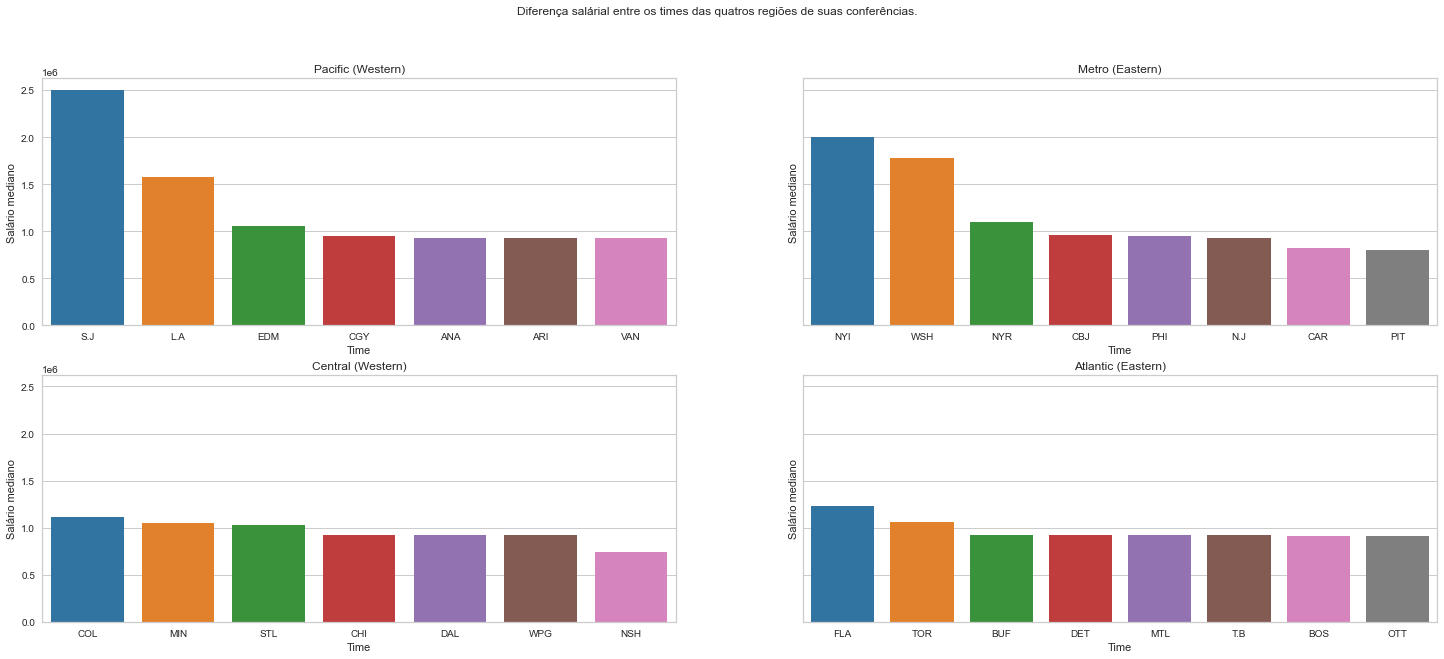

In [914]:
k = 0
fig, axes = plt.subplots(2,2, sharey=True)
fig.suptitle('Diferença salárial entre os times das quatros regiões de suas conferências.')
for i in range(2):
    for j in range(2):
        
        sns.barplot(ax=axes[i,j], x='Team', y='Salary', data=regioes_array[k].groupby
        (['Team'])['Salary'].aggregate(np.median).reset_index().sort_values('Salary', ascending=False))
        axes[i,j].set_title(regioes_titulo[k])
        axes[i,j].set(xlabel='Time', ylabel='Salário mediano')
        k = k + 1
    

Agora, análisando por região, percebe-se quais conferências e regiões são mais competitivas se for análisado por região. No lado Eastern, se encontra os Times San Jose Sharks e Los Angeles Kings, que se encontram na região Pacific. Do outro lado, na região Metro, se encontra os Times New York Islanders e Washigton com os salários acima da mediana.

Porém em ambos os lados existem times que possuem salários medianos iguais, porém, não se pode concluir dessa forma, não significa que só por que um time paga melhor seus jogadores é que o time é o melhor que os outros, é necessário analisar de forma individual cada jogador em relação a sua performance.

Agora, visualizando por região, fica mais nítido para saber quem são os times que pagam bem seus jogadores se for comparar com outros times.

In [915]:
# Essa função serve apenas para organizar os dados no scatterplot.
def ajustar_posicoes(i,j, l,k, _x):
    axes[i,j].text(
    # A posição x
    x=regioes_array[l][_x][k], 
    # A posição y
    y=regioes_array[l]['Salary'][k], 
    # Onde o nome ficará exposto
    s=regioes_array[l]['Last Name'][k])
               
    

In [916]:
# Essa função serve para plotar os jogadores no scatterplot através de uma condioção
def plotar_jogadores(_x, quantidade=0):
    l = -1
    # Loopando para entrar na região certa
    for i in range(2):
        for j in range(2):
            l = l + 1
            for k in range(regioes_array[l].shape[0]):
                # Para plotar o ano é diferente das demais, por isso precisa de uma condição diferente
                if(_x == 'Year'):
                    if(regioes_array[l]['Salary'][k] > 6000000):
                        # chamando a função para plotar corretamente os nomes dos jogadores
                        ajustar_posicoes(i,j,l,k, _x)
                # Os restantes dos plots são semelhantes, se não for o ano entrará aqui
                elif((regioes_array[l]['Salary'][k] > 6000000) | (regioes_array[l][_x][k] >= quantidade)):
                    # chamando a função para plotar corretamente os nomes dos jogadores
                   ajustar_posicoes(i,j,l,k, _x)

In [917]:

# Função que plotará o scatterplot
def scatterplot(_x, _xlabel=None, quantidade=0):
    k = 0
    for i in range(2):
        for j in range(2):
            
            # plotando o scatterplot, sempre será o salário em relação a determinada estatística dada com input
            sns.scatterplot(
            ax=axes[i,j], 
            x=_x,
            y='Salary', 
            hue='Team',
            data=regioes_array[k])

            # Criada uma linha de regressão em conjunto do scatterplot
            x_y = np.polyfit(regioes_array[k][_x], regioes_array[k]['Salary'],1)
            x = np.array(axes[i,j].get_xlim())
            y = x_y[1] + x_y[0] * x
            sns.lineplot(ax=axes[i,j], x=x, y=y)
            axes[i,j].set_title(regioes_titulo[k])
            axes[i,j].set(ylabel='Salário', xlabel=_xlabel)

            k = k + 1

    plotar_jogadores(_x, quantidade)

Antes de analisar os próximos gráficos a seguir, foi feita uma seguinte regra: Será mostrado apenas os jogadores que recebem acima de 6 milhões OU jogadores que possuem determinada estatística muito alta, o motivo dessa regra é para que os pontos do gráfico do scatterplot não ficassem sobrepondo uns aos outros que dificultaria no processo de visualização e compreensão dos gráficos.

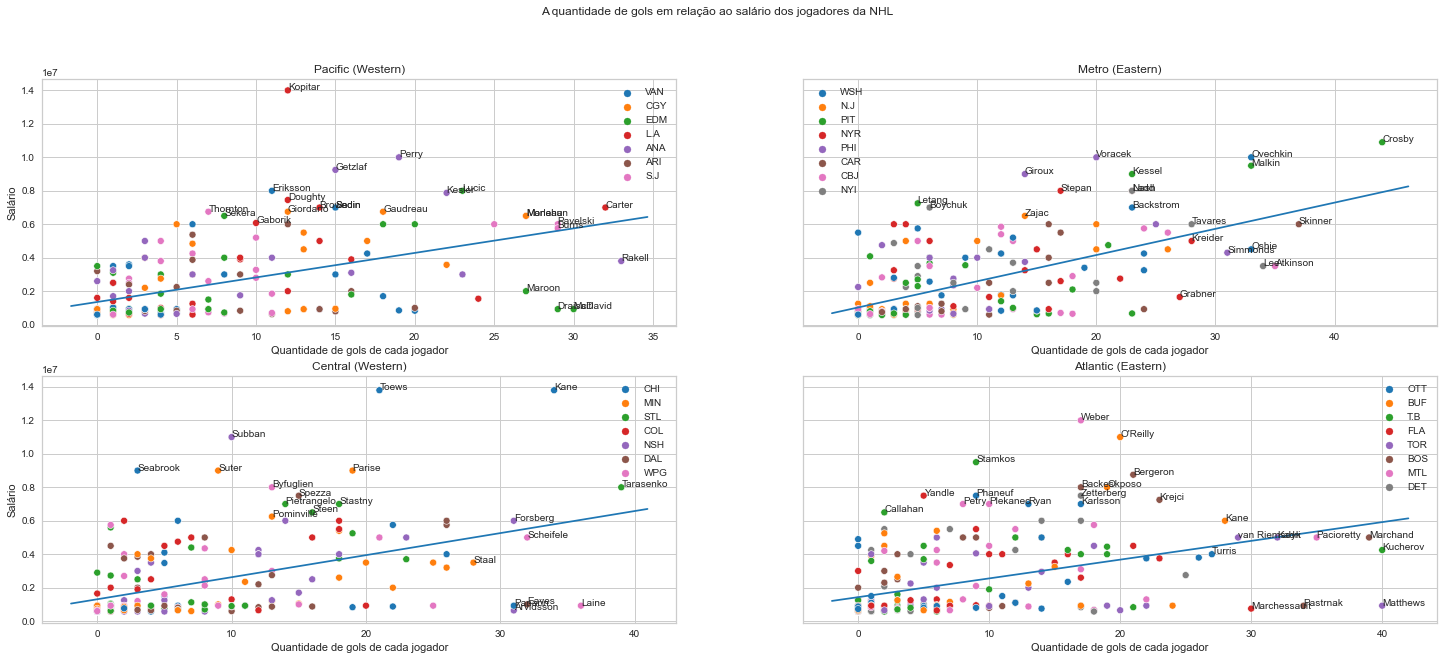

In [918]:
fig, axes = plt.subplots(2,2, sharey=True)
fig.suptitle('A quantidade de gols em relação ao salário dos jogadores da NHL')
scatterplot('G','Quantidade de gols de cada jogador', 27)


Assim como no futebol, o gol é quando o *puck* passa após a linha do gol. Nesse gráfico está mostrando o salário em relação a quantidade de gols de cada jogador, tendo bastante relação, principalmente na região Metro. Nessa região, o jogador principal é o jogador Crosby que joga pelo Pittsburgh Penguins (PIT) com mais de 40 gols, que é o time que tem o menor salário mediano de toda a liga, mas isso deve ser explicado pelo faot que há 4 jogadores do mesmo time recebendo acima de 6 milhões, sendo dois deles terem feito mais de 30 gols. 

Interessante também notar é que mesmo a quantidade de gols explique o tamanho do salário, não explica por que há jogadores que fizeram 40 gols como Kurechov do Tamba Bay Lightning (T.B) e Matthews do TOR (Toronto Maple Leafs), Sendo que há jogadores que recebem um salário muito alto mas não fizeram tantos gols como os jogadores Toews do Chicago Blackhawks (CHI) e Kopitar do Los Angeles Kings (L.A). 

Também é necessário notar que a região onde os jogadores fazem bastante gols mas recebem menos de 6 milhões é a região atlantic.

Então, só fazer gol não é o suficiente para resolver um salário alto.


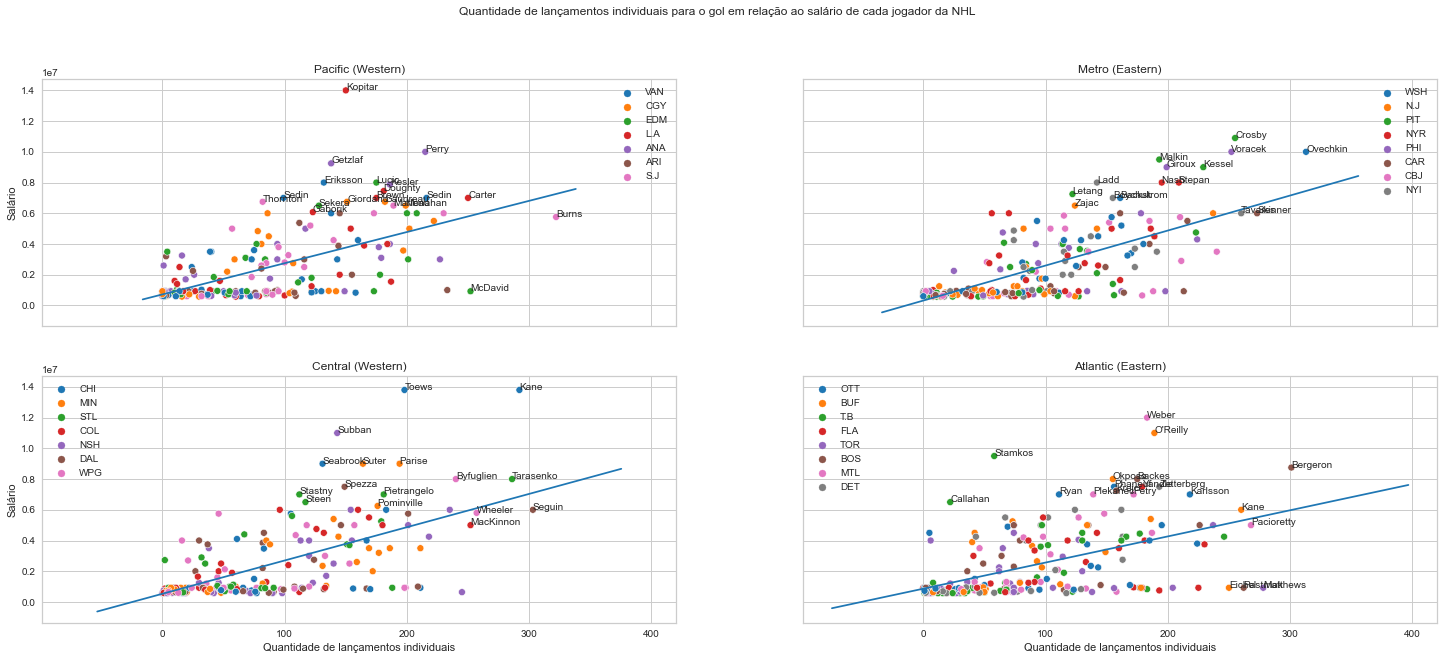

In [919]:
fig, axes = plt.subplots(2,2, sharey=True, sharex=True)
fig.suptitle('Quantidade de lançamentos individuais para o gol em relação ao salário de cada jogador da NHL' )
scatterplot('iSF','Quantidade de lançamentos individuais', 250)

Lançamentos Individuais, ou *Shots* são a quantidade de vezes que o jogador lançou o *puck* ao gol. 

Interessante notar novamente é que a quantidade de shots está relacionado pelo aumento salarial, voltando para a região Metro, percebe-se que agora quem domina é o jogador Ovechkin do Washigton Capitals (WSH), com mais de 300 shots para o gol, porém, esses mesmos shots não entraram, diferente do jogador Crosby, que há menos shots, mas contra partida, há mais gols que o jogador Ovechkin. 

Esse gráfico deu bastante variada em comparação com o gráfico anterior, em nenhum gráfico mostra que os mesmos jogadores que fazem bastante lançamentos são os mesmos que fazem bastante gol, como por exemplo o jogador Burns do Dallas Stars (DAL) da região Pacific, onde é o jogador que mas fez shots, mas no gráfico anterior que fez mais gols de sua região foi o Rakell do Anaheim Ducks (ANA).

Apenas com os lançamentos não nos dizem muita coisa, mas os mesmos que fazem bastante shots fazem bastante gols também.

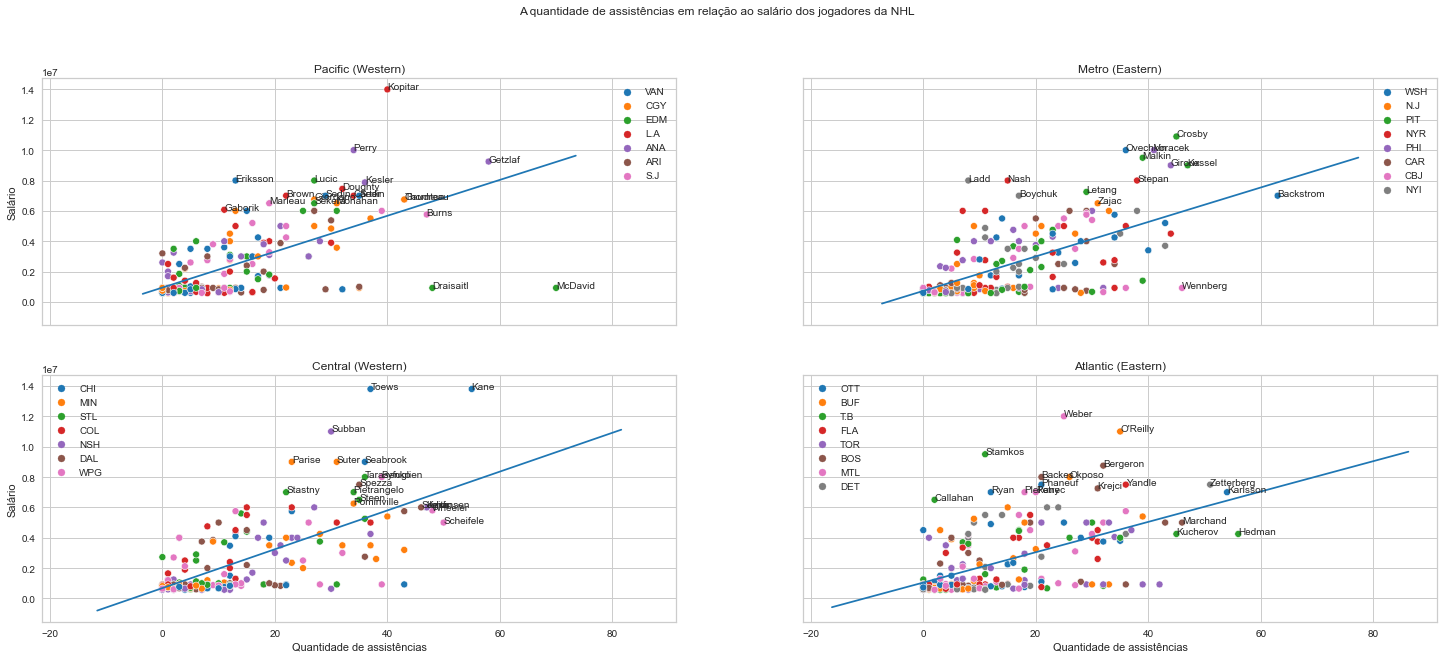

In [920]:
fig, axes = plt.subplots(2,2, sharey=True, sharex=True)
fig.suptitle('A quantidade de assistências em relação ao salário dos jogadores da NHL')
scatterplot('A','Quantidade de assistências',45)

Como também no futebol, a assistência é quando você passa o *puck* para outro jogador fazer gol.

Importante realçar que o jogador Crosby, não se move muito do gráfico quando comparado com suas estatísticas, da mesma acontece com os jogadores Kopitar, Kane, Toews, Ovechkin e Weber. 

Assim como nos gols, parece que só faz assistência não é o suficiente para você receber um salário acima de 6 de milhões, como por exemplo o jogador McDavid do Edmonton Oilers (EDM). Mas há também jogadores que fizeram mais do que 60 assistências e recebem acima de 6 milhões como o jogador Backstrom do Washigton Capitals (WSH), mas os jogadores que fazem bastante gols e assistência continuam no mesmo lugar, que até então, pode justificar o seus salários.

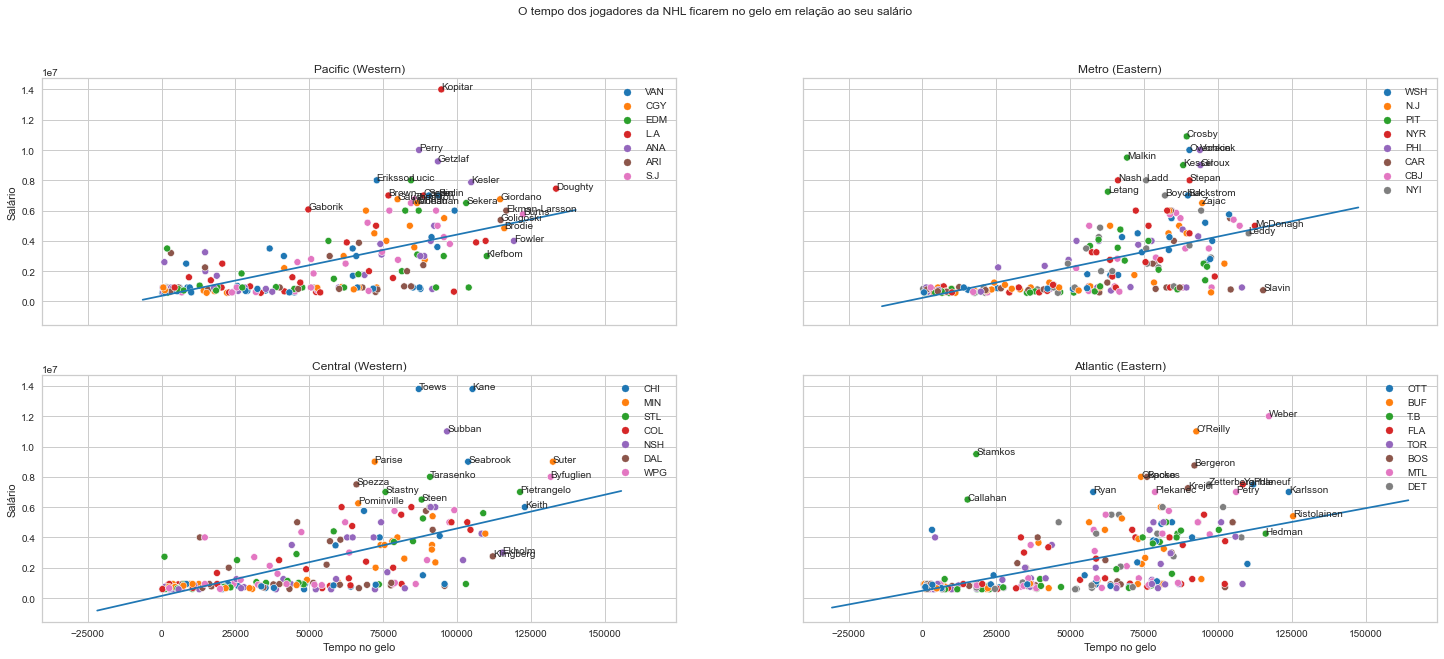

In [921]:
fig, axes = plt.subplots(2,2, sharey=True, sharex=True)
fig.suptitle('O tempo dos jogadores da NHL ficarem no gelo em relação ao seu salário ')
scatterplot('TOI','Tempo no gelo', 110000)

*Time on Ice* ou Tempo no gelo, é uma estatística do hockey, como o próprio nome explica é o tempo que o jogador ficou no gelo, em segundos.

É uma estatística bastante interessante, pois no hockey é um esporte que os jogadores precisam estar me movimento e por conta disso se cansam muito. Analisando por esse gráfico, a maioria dos jogadores que ficaram mais tempo no gelo, recebem um salário acima de 6 milhões, perto ou acima de 100000 segundos no gelo, sendo o jogaor Doughty do time Los Angeles Kings (L.A) da região Pacific, o jogador que ficou mais tempo no gelo na NHL com mais de 125000 segundos com o salário perto de 8 milhões, porém não é destaque nem em assistências e gols.

Com certeza, TOI é uma estatística que pode dizer muita coisa, obviamente que quem fica mais tempo no gelo tem mais oportunidade de fazer mais gols e mais assistências, porém é necessário ter bastante resistência para alcançar esse feito.

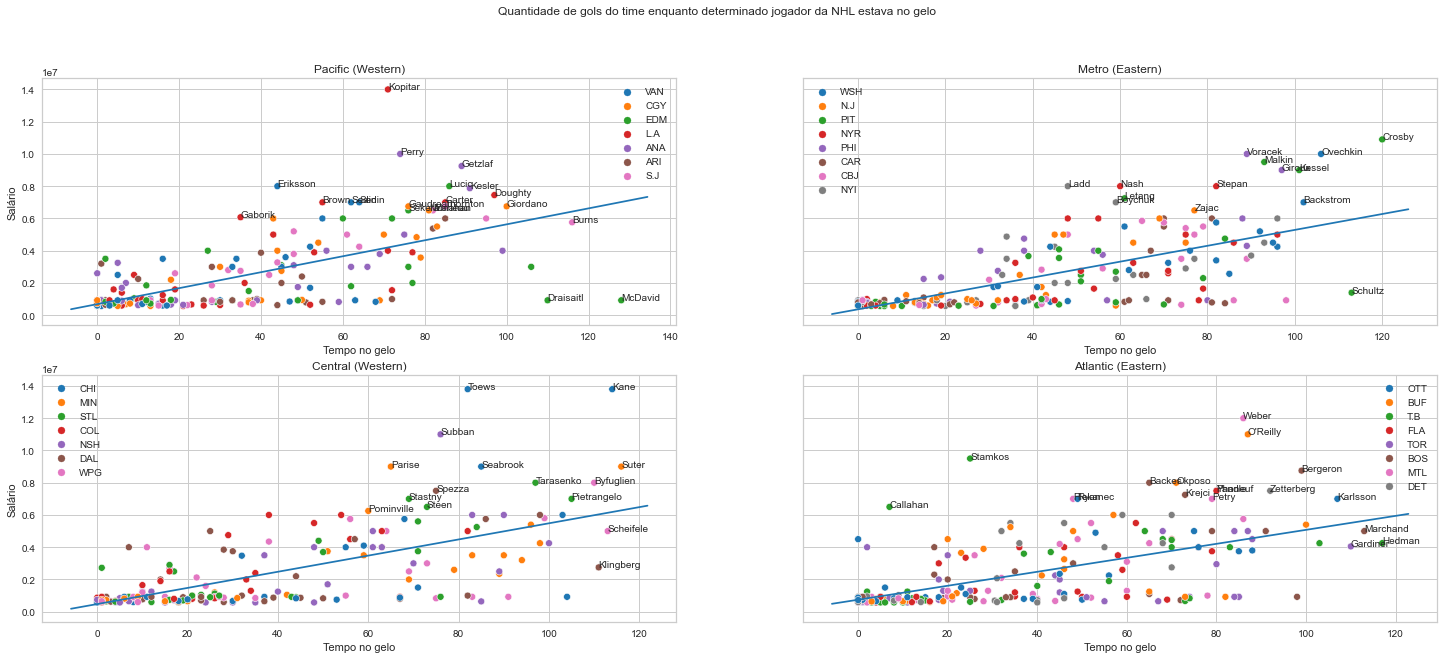

In [922]:
fig, axes = plt.subplots(2,2, sharey=True)
fig.suptitle('Quantidade de gols do time enquanto determinado jogador da NHL estava no gelo')
scatterplot('GF','Tempo no gelo',110)

GF é uma estatística de total de gols que o time fez enquanto determinado jogador estava no gelo.

Essa estatística também é bastante interessante, os jogadores como Crosby e Kane dominam essa estatística, esses são jogadores que além de fazer bastante assistências e gols, quando estão em campo o seu time também consegue fazer bastante gols, ambos conseguiram coletar mais de 100 gols só por estarem presente, essa estatística deve definir também que é o capitão, como de fato esses jogadores são.

Mas tamb[em a jogadores que são responsáveis pela quantidade de gols, como o McDavid do Edmonton Oilers (EDM) que já foi citado em ser responsável por bastante assistências, mas nada além disso. 

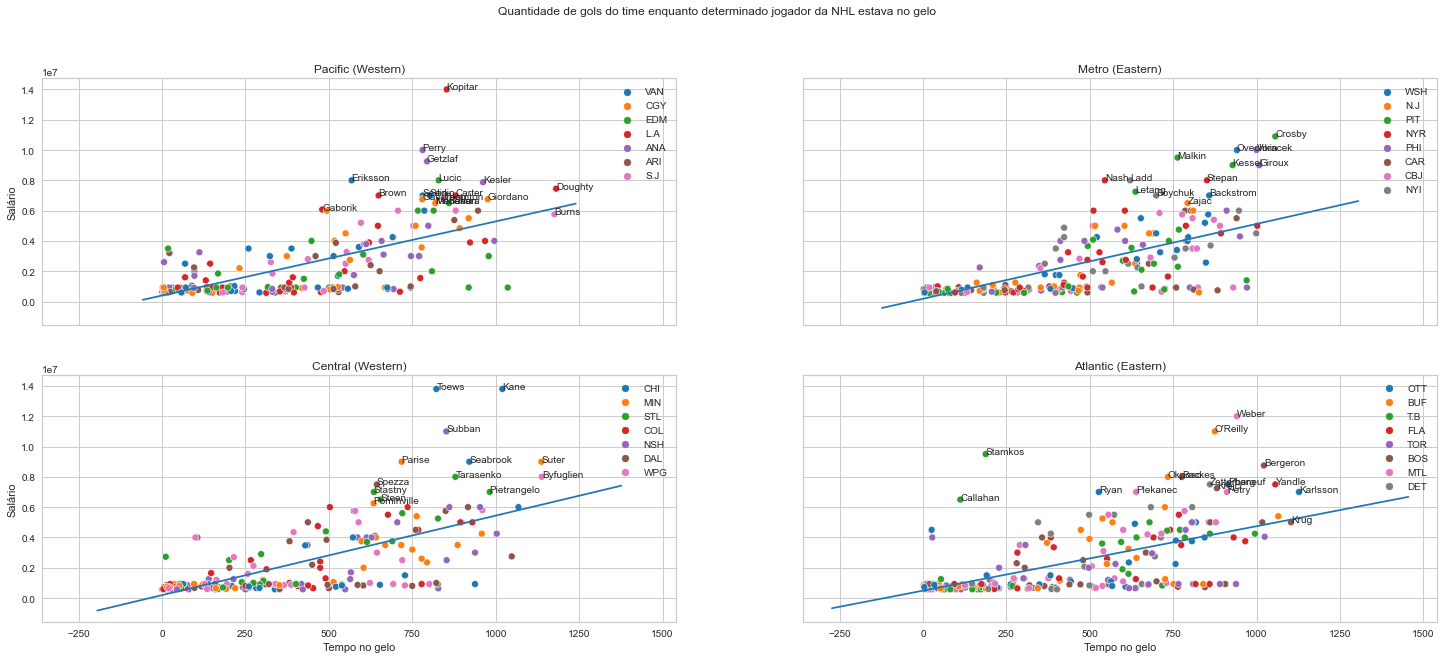

In [923]:
fig, axes = plt.subplots(2,2, sharey=True, sharex=True)
fig.suptitle('Quantidade de gols do time enquanto determinado jogador da NHL estava no gelo')
scatterplot('SF','Tempo no gelo',1100)

SF é uma estatística para ver a quantidade de shots do time enquanto esse jogador estão no gelo.

Assim como o GF, é uma outra excelete estatística, Kane e Crosby continuam marcando presença, destaque também para o jogador Doutghty, por fazer seu time fazer quase 1200, o que explica também ser ele o jogador com o maior TOI da NHL.

Essa estatística responde bastante coisa, principalmente que ela está bastante relacionado ao aumento do salário em relação a quantidade de *shots* de seu time.



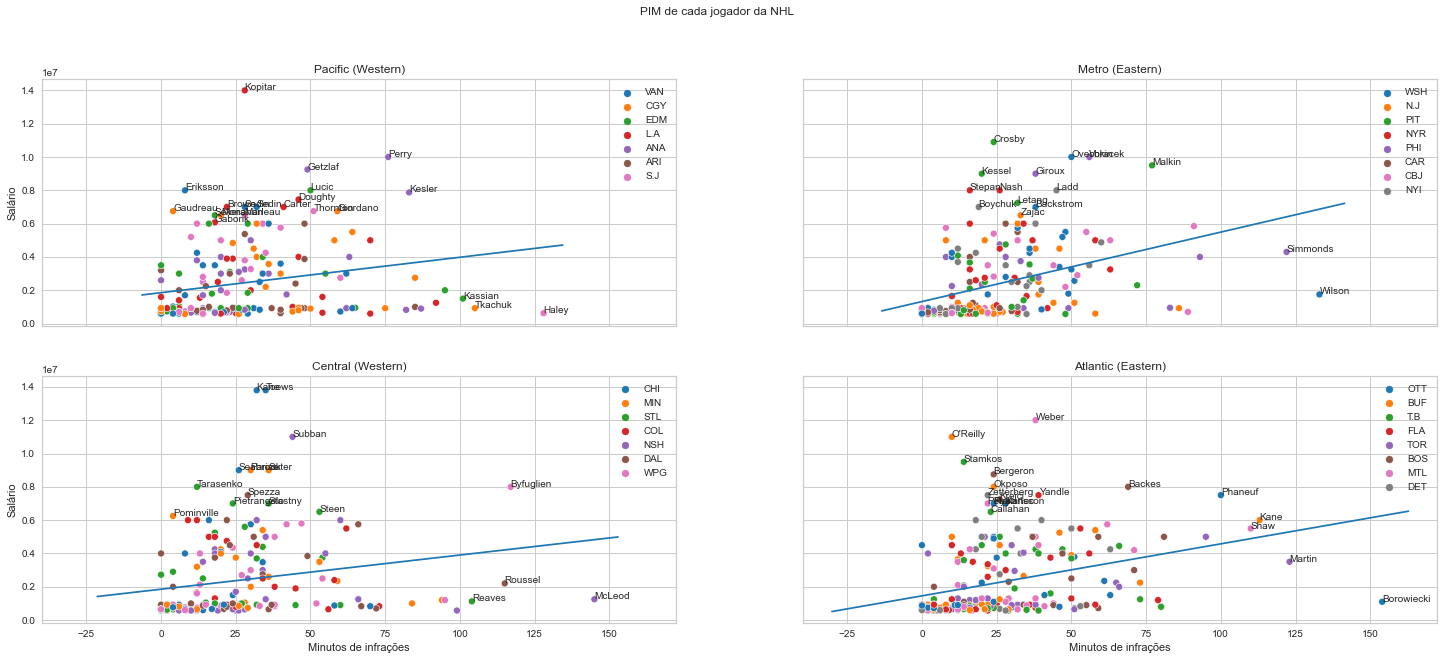

In [924]:
fig, axes = plt.subplots(2,2, sharey=True, sharex=True)
fig.suptitle('PIM de cada jogador da NHL')
scatterplot('PIM','Minutos de infrações', 100)

Primeiramente, PIM significa *Penalty Infraction Minutes*, que pode ser traduzida para minutos de infrações de penalidade. Basicamente, cada vez que um jogador comete uma infração ele irá para um lugar que é conhecido no hockey como *box*, onde ele ficará uma quantidade de minutos dependendo de sua infração, geralmente quem possui um PIM muito alto são jogadores que são conhecidos como Enforcers (que tem a função de lutar com outros jogadores em resposta a provocações de outros enforcers).

Analisando por cada região, percebemos que os jogadores que podem ser considerados enforcers são: Haley do S.J, McLeod do NSH, Wilson do PIT e o Borowiecki de OTT, todos acima de 120 minutos na caixa, sendo o jogador com o maior tempo o Borowiecki com mais de 150 Minutos.

Nota-se que em cada região, os jogadores mais caros possuem um PIM menor que 60, com exceção do jogador Perry com mais de 60 minutos.

Se for analisar em conjunto com o parâmetro TOI, é claro que é mais vantajoso para um time ter um jogador que fique mais tempo no gelo do que fora dele, então os enforcers não possuem tanto valor.

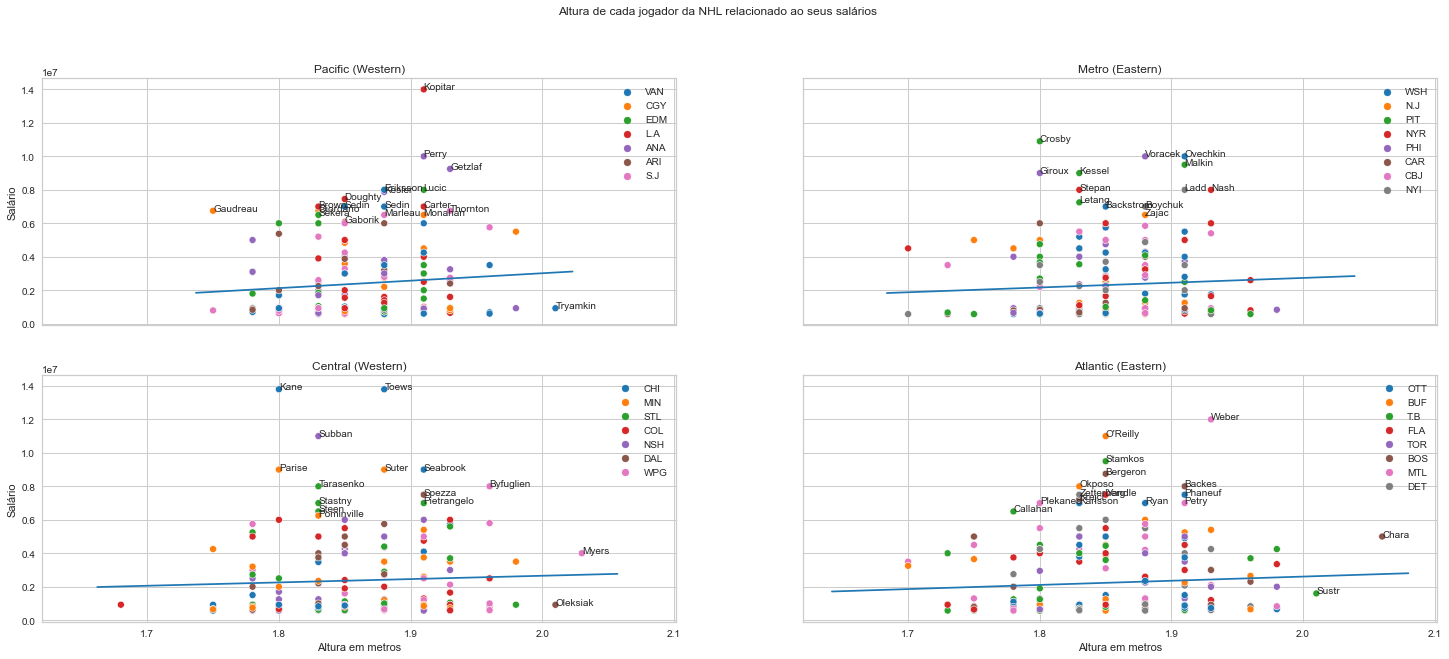

In [925]:
fig, axes = plt.subplots(2,2, sharey=True, sharex=True)
fig.suptitle('Altura de cada jogador da NHL relacionado ao seus salários')
scatterplot('Ht', 'Altura em metros', 2)

Como pode ser observado pelo gráfico, a altura não está relacionada com o salário, são poucos jogadores acima de 2 metros, e a grande maioria está entre 1.80 e 1.90 metros. Mas também é importante dizer que apenas há um jogador abaixo de 1.70.

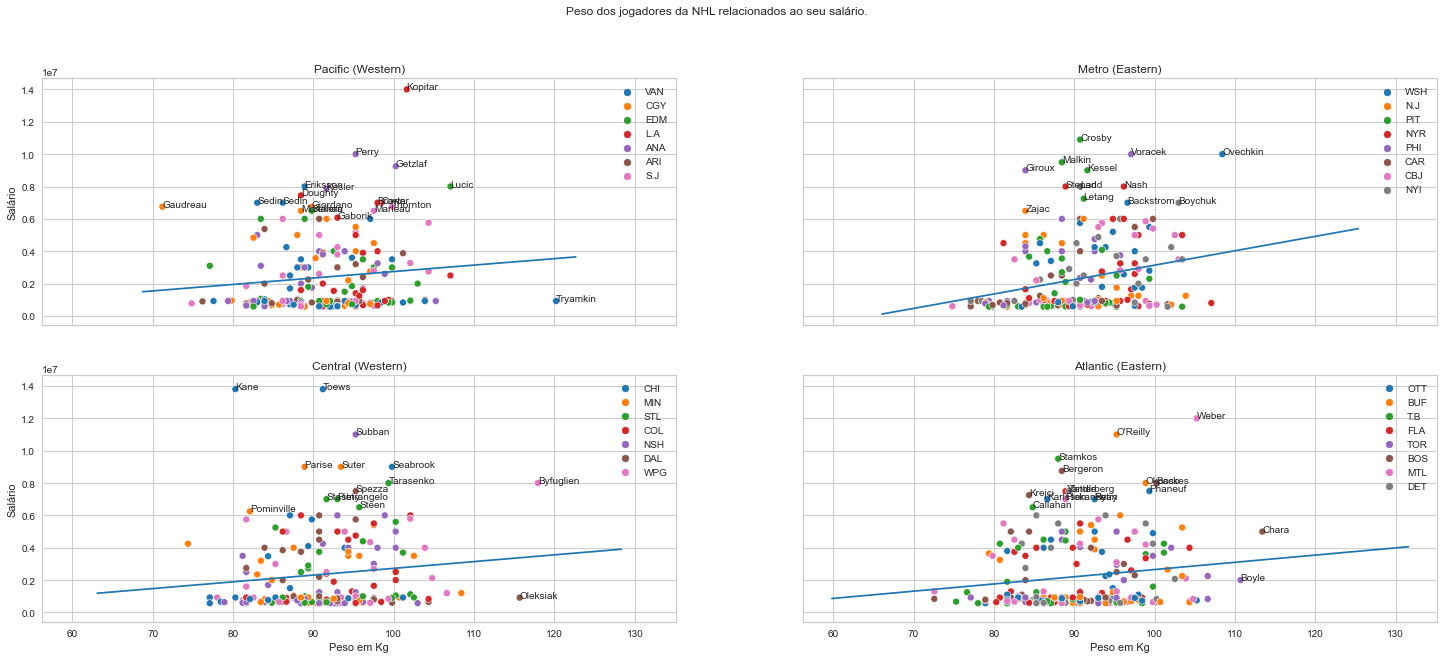

In [926]:
fig, axes = plt.subplots(2,2, sharey=True, sharex=True)
fig.suptitle('Peso dos jogadores da NHL relacionados ao seu salário.')
scatterplot('Wt', 'Peso em Kg', 110)

Um pouco diferente da altura, parece que o peso afeta muito mais o salário do que a altura, porém, isso não é a consequência, como por exemplo o jogador Ovechkin, sendo o jogador mais pesado de sua região, com mais de 100 quilos com uns dos maiores salários, assim como também tem o jogador Kane que é uns dos jogadores mais leves de sua região, porém seu salário é uns dos mais caros. 

Então, tanto como peso e a altura não estão relacionados com o salário.

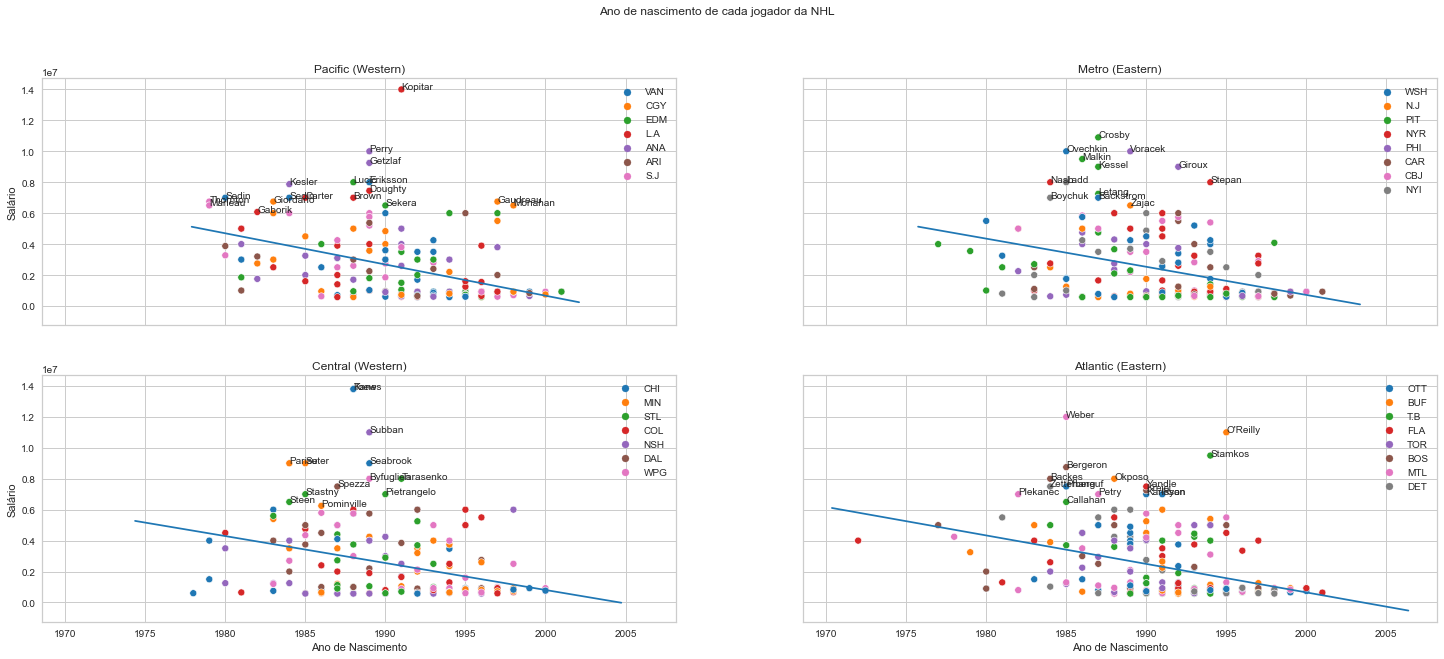

In [927]:
fig, axes = plt.subplots(2,2, sharey=True, sharex=True)
fig.suptitle('Ano de nascimento de cada jogador da NHL')
scatterplot('Year', 'Ano de Nascimento', 1999)

Assim como em outros esportes, a idade tem um fator bastante importante também, como esse dataset é de 2016, um jogador nascido em 1998 nessa época tinha 18 anos. Então, como o jogador Kopitar nasceu em 1991 ele tinha 25/26 anos na época, já recebendo um salário muito alto, mas os outros jogadores mais caros na época tinham menos de 30 anos também. Há também bastante jogadores que recebem acima de 3 milhões com 18 anos.

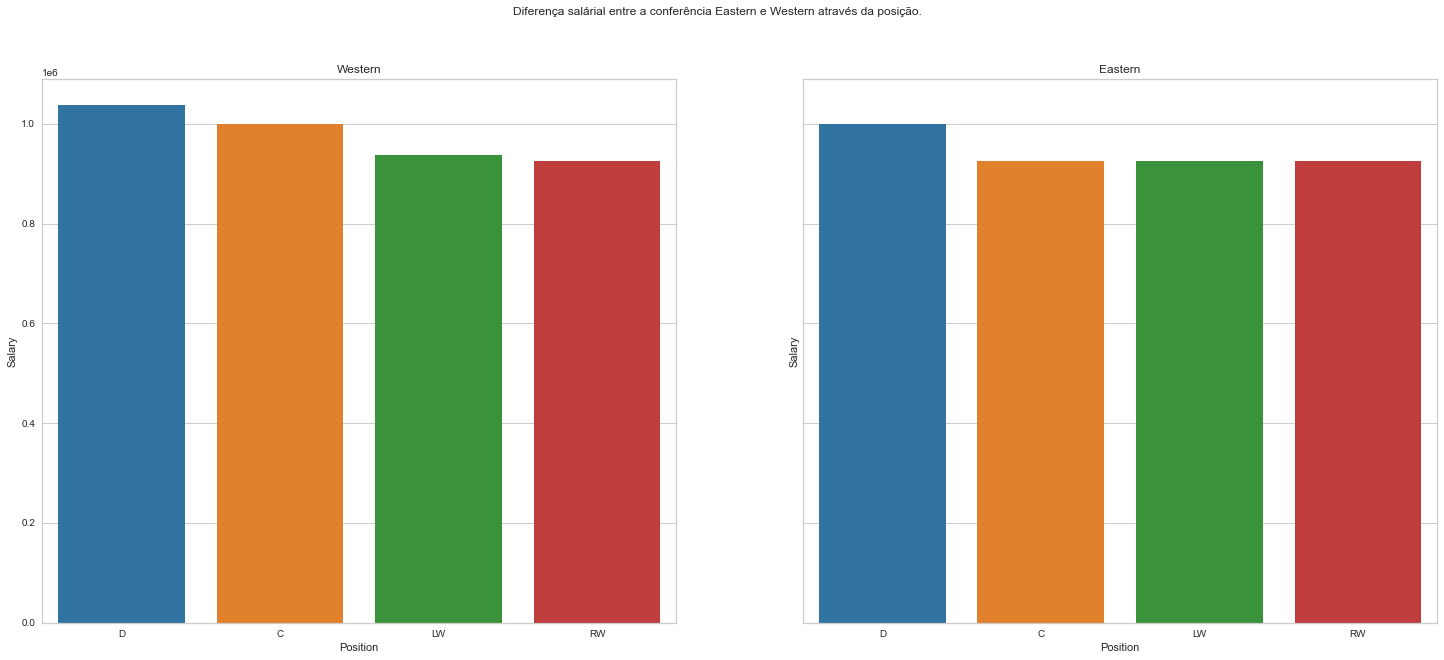

In [928]:
fig, axes = plt.subplots(1,2, sharey=True, sharex=True)
fig.suptitle('Diferença salárial entre a conferência Eastern e Western através da posição.')
for i in range(len(conferencia_array)):
    axes[i].set_title(titulo_conferencia[i])
    sns.barplot(ax=axes[i], x='Position', y='Salary', data=conferencia_array[i].
    groupby(['Position'])['Salary'].aggregate(np.median).reset_index().sort_values('Salary', ascending=False))

Por curiosidade, foi feito também os salários medianos de cada posição por conferência, sendo a Defesa tendo um salário um pouco maior que a maioria, e o C recebendo pouco mais na conferência Western, mas no geral, os salários das posições são proporcionais. Interessante saber também é que o foco da defesa é impedir que o outro time faça mais gols, então é outro índicio que a quantidade de gols não justifica o salário.

[Text(0.5, 1.0, 'Quantidade de canhotos e destros na NHL organizado por posição.'),
 Text(0, 0.5, 'Quantidade de jogadores'),
 Text(0.5, 0, 'Mão'),
 [Text(0, 0, 'Canhotos'), Text(1, 0, 'Destros')]]

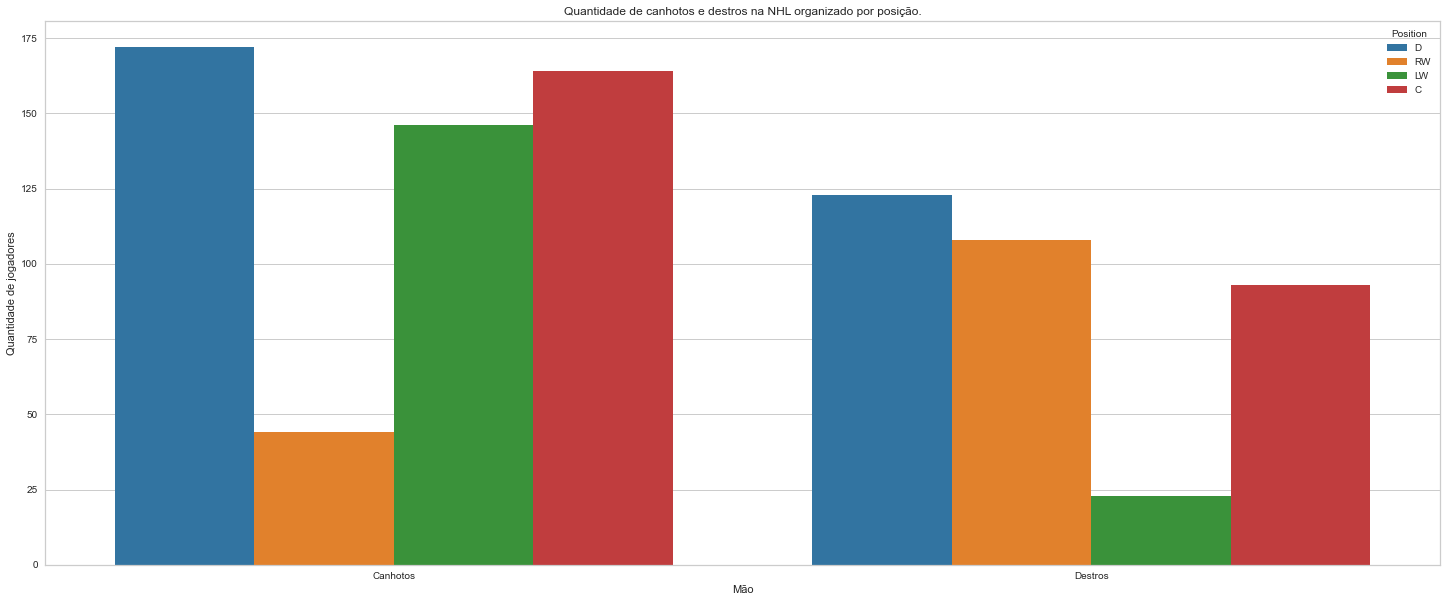

In [929]:
sns.countplot(x='Hand', hue='Position', data=nhl).set(title='Quantidade de canhotos e destros na NHL organizado por posição.', ylabel='Quantidade de jogadores',  xlabel='Mão', xticklabels=['Canhotos', 'Destros'] )

Analisando esse gráfico, há muito mais canhotos do que destros, porém, quando se trata da posição Right Wing (RW), há muito mais destros do que canhotos.

Esses são os parâmetros principais que a NHL utiliza para verificar a qualidade do jogador, percebemos que são poucos jogadores que conseguem fazer uma grande quantidade em cada parâmetro.
Destaque para Crosby, Ovechkin, Kane, Toews e Weber que possuem grandes números em todos os parâmetros, é normal jogadores que só são bons em algo, como por exemplo o jogador Matthews, que marcou bastante gols, mas se for comparar suas outra estatística não tem nenhum outro destaque, significando que o time mais joga para ele do que ele jogar em time.
Mas há anomalias também como o jogador Kopitar, os stats dele são medianos em comparação aos jogadores destacados, verificando seu salário na época, na realidade era de 6 milhões e se for fazer novamente uma análise, esse salário faria muito mais sentido.

Por isso, apenas pegarei os dois jogadores mais caros de cada região para fazer uma comparação de suas estatísticas, com exceção do jogador Kopitar, já que o seu salário está errado.

In [930]:
df = pd.DataFrame()

In [931]:
jogadores_destaques = ['Getzlaf', 'Perry' ,'Kane', 'Toews', 'Crosby','Ovechkin', 'Weber', "O'Reilly"]
dados_importantes = ['Last Name', 'Hand', 'Position', 'Team', 'Region', 'Salary', 'G', 'A', 'iSF', 'SF', 'GF', 'TOI', 'PIM']

In [932]:
mask = (nhl['Last Name'].isin(jogadores_destaques)) & (nhl['Salary'] > 6000000)
jogadores_destaques = nhl.loc[mask, dados_importantes].sort_values(by='Salary', ascending=False).set_index('Last Name').copy()
jogadores_destaques

,Hand,Position,Team,Region,Salary,G,A,iSF,SF,GF,TOI,PIM
Last Name,,,,,,,,,,,,
Kane,L,RW,CHI,Central,13800000.0,34.0,55.0,292.0,1020.0,114.0,105263.0,32.0
Toews,L,C,CHI,Central,13800000.0,21.0,37.0,198.0,822.0,82.0,87066.0,35.0
Weber,R,D,MTL,Atlantic,12000000.0,17.0,25.0,183.0,941.0,86.0,117286.0,38.0
O'Reilly,L,C,BUF,Atlantic,11000000.0,20.0,35.0,189.0,875.0,87.0,92700.0,10.0
Crosby,L,C,PIT,Metro,10900000.0,44.0,45.0,255.0,1056.0,120.0,89450.0,24.0
Ovechkin,R,LW,WSH,Metro,10000000.0,33.0,36.0,313.0,941.0,106.0,90361.0,50.0
Perry,R,RW,ANA,Pacific,10000000.0,19.0,34.0,215.0,781.0,74.0,87162.0,76.0
Getzlaf,R,C,ANA,Pacific,9250000.0,15.0,58.0,138.0,794.0,89.0,93553.0,49.0


Esse dataframe tem informações interessantes, existe a mesma quantidade de canhotos e destros, a maioria desses jogadores jogam no centro, e só tem apenas uma única pessoa na defesa. Essa pessoa que joga na defesa é o jogador Weber, que faz bastante sentido, pois é o jogador que menos tem gols e assistências, porém ele tem o maior tempo no gelo que a maioria e tem o 3° maior salário da NHL.

In [933]:
colunas = jogadores_destaques.loc[:,  'Salary':].columns
colunas_nome = ['Salário', 'Gols', 'Assistências', 'Lançamentos', 'Lançamentos totais', 'Gols totais', 'Tempo no Gelo', 'Infrações por minuto']

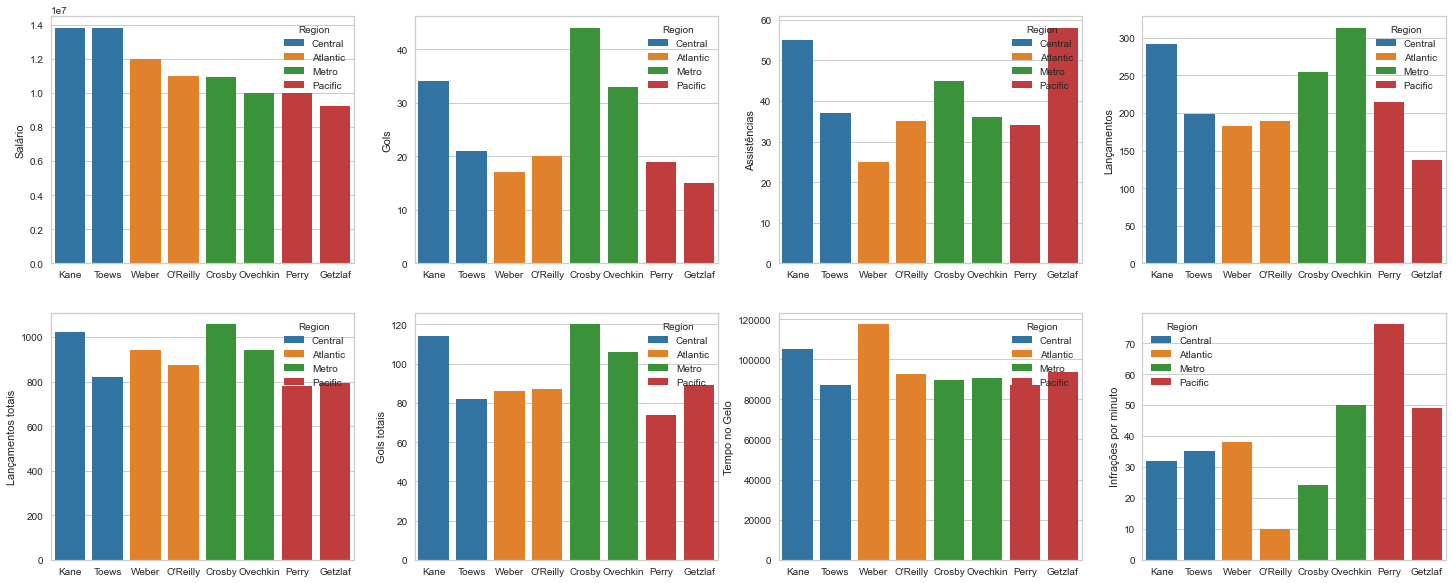

In [934]:
fig, axes = plt.subplots(2,4)
k = 0
for i in range(2):
    for j in range(4):
        sns.barplot(ax=axes[i, j], hue='Region', dodge=False, x=jogadores_destaques.index, y=colunas[k], data=jogadores_destaques)
        axes[i,j].set(xlabel=None, ylabel=colunas_nome[k])
        k = k + 1

De primeira, já se tem uma uniformidade nos salários regionais, sendo a central, com os jogadores até a região Pacific, com o seu jogador mais caro custando mais do que 10 Milhões. Nesses gráficos podemos de fato definir o que torna um jogador muito caro, o fato principal é a **quantidade de assistência** + **tempo no gelo**, basicamente, quão mais o jogador fique no gelo ajudando o time, melhor. Como por exemplo o jogador Kane, com o maior salário, não tem a maior assistência que o jogador Getzlaf, porém ele fica muito mais tempo no gelo e também é responsável pelo seu time fazer bastante gols. Interessante saber também que só fazer gols e assistência não é o suficiente, pois o jogador Crosby tem a maior quantidade de gols feitos como também é responsável pelo seu time fazer bastante gols, porém ele é uns dos jogadores principais que fica menos tempo jogando, o que deve impactar em seu salário.

Concluindo, um excelente jogador é aquele que pode ficar jogando por muito tempo e também que ajuda bastante o seu time a marcar bastante gols.